Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](http://https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

In [1]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [2]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                  NaN             Afghanistan  33.000000   
1                                  NaN                 Albania  41.153300   
2                                  NaN                 Algeria  28.033900   
3                                  NaN                 Andorra  42.506300   
4                                  NaN                  Angola -11.202700   
5                                  NaN     Antigua and Barbuda  17.060800   
6                                  NaN               Argentina -38.416100   
7                                  NaN                 Armenia  40.069100   
8         Australian Capital Territory               Australia -35.473500   
9                      New South Wales               Australia -33.868800   
10                  Northern Territory               Australia -12.463400   
11                          Queensland               Australia -28.016700   
12                     South Australia               Australia -34.928500   
13                            Tasmania               Australia -41.454500   
14                            Victoria               Australia -37.813600   
15                   Western Australia               Australia -31.950500   
16                                 NaN                 Austria  47.516200   
17                                 NaN              Azerbaijan  40.143100   
18                                 NaN                 Bahamas  25.034300   
19                                 NaN                 Bahrain  26.027500   
20                                 NaN              Bangladesh  23.685000   
21                                 NaN                Barbados  13.193900   
22                                 NaN                 Belarus  53.709800   
23                                 NaN                 Belgium  50.833300   
24                                 NaN                   Benin   9.307700   
25                                 NaN                  Bhutan  27.514200   
26                                 NaN                 Bolivia -16.290200   
27                                 NaN  Bosnia and Herzegovina  43.915900   
28                                 NaN                  Brazil -14.235000   
29                                 NaN                  Brunei   4.535300   
..                                 ...                     ...        ...   
229                                NaN                  Zambia -15.416700   
230                                NaN                Zimbabwe -20.000000   
231                   Diamond Princess                  Canada   0.000000   
232                                NaN                Dominica  15.415000   
233                                NaN                 Grenada  12.116500   
234                                NaN              Mozambique -18.665695   
235                                NaN                   Syria  34.802075   
236                                NaN             Timor-Leste  -8.874217   
237                                NaN                  Belize  13.193900   
238                          Recovered                  Canada   0.000000   
239                                NaN                    Laos  19.856270   
240                                NaN                   Libya  26.335100   
241                                NaN      West Bank and Gaza  31.952200   
242                                NaN           Guinea-Bissau  11.803700   
243                                NaN                    Mali  17.570692   
244                                NaN   Saint Kitts and Nevis  17.357822   
245              Northwest Territories                  Canada  64.825500   
246                              Yukon                  Canada  64.282300   
247                                NaN                  Kosovo  42.602636   
248                                NaN                   Burma  21.916200   
249                 

## Get Population

In [3]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [4]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                  NaN             Afghanistan  33.000000   
1                                  NaN                 Albania  41.153300   
2                                  NaN                 Algeria  28.033900   
3                                  NaN                 Andorra  42.506300   
4                                  NaN                  Angola -11.202700   
5                                  NaN     Antigua and Barbuda  17.060800   
6                                  NaN               Argentina -38.416100   
7                                  NaN                 Armenia  40.069100   
8         Australian Capital Territory               Australia -35.473500   
9                      New South Wales               Australia -33.868800   
10                  Northern Territory               Australia -12.463400   
11                          Queensland               Australia -28.016700   
12                     South Australia               Australia -34.928500   
13                            Tasmania               Australia -41.454500   
14                            Victoria               Australia -37.813600   
15                   Western Australia               Australia -31.950500   
16                                 NaN                 Austria  47.516200   
17                                 NaN              Azerbaijan  40.143100   
18                                 NaN                 Bahamas  25.034300   
19                                 NaN                 Bahrain  26.027500   
20                                 NaN              Bangladesh  23.685000   
21                                 NaN                Barbados  13.193900   
22                                 NaN                 Belarus  53.709800   
23                                 NaN                 Belgium  50.833300   
24                                 NaN                   Benin   9.307700   
25                                 NaN                  Bhutan  27.514200   
26                                 NaN                 Bolivia -16.290200   
27                                 NaN  Bosnia and Herzegovina  43.915900   
28                                 NaN                  Brazil -14.235000   
29                                 NaN                  Brunei   4.535300   
..                                 ...                     ...        ...   
231                                NaN                  Zambia -15.416700   
232                                NaN                Zimbabwe -20.000000   
233                   Diamond Princess                  Canada   0.000000   
234                                NaN                Dominica  15.415000   
235                                NaN                 Grenada  12.116500   
236                                NaN              Mozambique -18.665695   
237                                NaN                   Syria  34.802075   
238                                NaN             Timor-Leste  -8.874217   
239                                NaN                  Belize  13.193900   
240                          Recovered                  Canada   0.000000   
241                                NaN                    Laos  19.856270   
242                                NaN                   Libya  26.335100   
243                                NaN      West Bank and Gaza  31.952200   
244                                NaN           Guinea-Bissau  11.803700   
245                                NaN                    Mali  17.570692   
246                                NaN   Saint Kitts and Nevis  17.357822   
247              Northwest Territories                  Canada  64.825500   
248                              Yukon                  Canada  64.282300   
249                                NaN                  Kosovo  42.602636   
250                                NaN                   Burma  21.916200   
251                 

In [5]:
# merge region death
death.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/28/20  \
185        0        0        0        0        0        0  ...       18   
186        0        0        0        0        0        0  ...      100   
187        0        0        0        0        0        0  ...        1   
188        0        0        0        0        0        0  ...       37   
189        0        0        0        0        0        0  ...        4   
190        0        0        0        0        0        0  ...        0   
191        0        0        0        0        0        0  ...        0   
192        0        0        0        0        0        0  ...        0   
193        0        0        0        0        0        0  ...       22   
194        0        0        0        0        0        0  ...        4   

     3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20   Population   \
185       22       31       33      43      57      71      79    37,980,000   
186      119      140      160     187     209     246     266    10,290,000   
187        1        1        2       2       3       3       3           NaN   
188       43       65       82      92     115     133     146    19,530,000   
189        8        9       17      24      30      34      43   144,500,000   
190        0        0        0       0       0       0       0           NaN   
191        0        0        0       0       0       0       0           NaN   
192        0        0        0       0       0       0       0           NaN   
193       22       25       26      26      30      30      32           NaN   
194        8        8       10      16      21      25      29           NaN   

                                   region  
185                            Poland_nan  
186                          Portugal_nan  
187                             Qatar_nan  
188                           Romania_nan  
189                            Russia_nan  
190                            Rwanda_nan  
191                       Saint Lucia_nan  
192  Saint Vincent and the Grenadines_nan  
193                        San Marino_nan  
194                      Saudi Arabia_nan  

[10 rows x 80 columns]

In [6]:
# merge region recover
recover.iloc[175:185,:]

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
175            NaN              Oman  21.0000   57.0000        0        0   
176            NaN          Pakistan  30.3753   69.3451        0        0   
177            NaN            Panama   8.5380  -80.7821        0        0   
178            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
179            NaN          Paraguay -23.4425  -58.4438        0        0   
180            NaN              Peru  -9.1900  -75.0152        0        0   
181            NaN       Philippines  13.0000  122.0000        0        0   
182            NaN            Poland  51.9194   19.1451        0        0   
183            NaN          Portugal  39.3999   -8.2245        0        0   
184            NaN             Qatar  25.3548   51.1839        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/28/20  3/29/20  3/30/20  \
175        0        0        0        0  ...       23       23       29   
176        0        0        0        0  ...       29       29       76   
177        0        0        0        0  ...        2        4        4   
178        0        0        0        0  ...        0        0        0   
179        0        0        0        0  ...        1        1        1   
180        0        0        0        0  ...       16       16       53   
181        0        0        0        0  ...       35       42       42   
182        0        0        0        0  ...        7        7        7   
183        0        0        0        0  ...       43       43       43   
184        0        0        0        0  ...       45       48       51   

     3/31/20  4/1/20  4/2/20  4/3/20  4/4/20   Population   \
175       34      34      57      57      61     4,636,000   
176       76      94     125     126     131   197,000,000   
177        9       9       9      10      13           NaN   
178        0       0       0       0       0           NaN   
179        1       1       2       6      12           NaN   
180      394     394     537     537     914           NaN   
181       49      50      51      52      57   104,900,000   
182        7      47      56      56     116    37,980,000   
183       43      43      68      68      75    10,290,000   
184       62      71      72      93     109           NaN   

                   region  
175              Oman_nan  
176          Pakistan_nan  
177            Panama_nan  
178  Papua New Guinea_nan  
179          Paraguay_nan  
180              Peru_nan  
181       Philippines_nan  
182            Poland_nan  
183          Portugal_nan  
184             Qatar_nan  

[10 rows x 80 columns]

In [7]:
confirmed.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/28/20  \
185        0        0        0        0        0        0  ...     1638   
186        0        0        0        0        0        0  ...     5170   
187        0        0        0        0        0        0  ...      590   
188        0        0        0        0        0        0  ...     1452   
189        0        0        0        0        0        0  ...     1264   
190        0        0        0        0        0        0  ...       60   
191        0        0        0        0        0        0  ...        3   
192        0        0        0        0        0        0  ...        1   
193        0        0        0        0        0        0  ...      224   
194        0        0        0        0        0        0  ...     1203   

     3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20   Population   \
185     1862     2055     2311    2554    2946    3383    3627    37,980,000   
186     5962     6408     7443    8251    9034    9886   10524    10,290,000   
187      634      693      781     835     949    1075    1325           NaN   
188     1815     2109     2245    2460    2738    3183    3613    19,530,000   
189     1534     1836     2337    2777    3548    4149    4731   144,500,000   
190       70       70       75      82      84      89     102           NaN   
191        9        9       13      13      13      13      14           NaN   
192        1        1        1       1       2       3       7           NaN   
193      224      230      236     236     245     245     259           NaN   
194     1299     1453     1563    1720    1885    2039    2179           NaN   

                                   region  
185                            Poland_nan  
186                          Portugal_nan  
187                             Qatar_nan  
188                           Romania_nan  
189                            Russia_nan  
190                            Rwanda_nan  
191                       Saint Lucia_nan  
192  Saint Vincent and the Grenadines_nan  
193                        San Marino_nan  
194                      Saudi Arabia_nan  

[10 rows x 80 columns]

In [8]:
confirmed.iloc[220:230,:]

Province/State  Country/Region      Lat     Long  1/22/20  1/23/20  \
220   Cayman Islands  United Kingdom  19.3133 -81.2546        0        0   
221  Channel Islands  United Kingdom  49.3723  -2.3644        0        0   
222        Gibraltar  United Kingdom  36.1408  -5.3536        0        0   
223      Isle of Man  United Kingdom  54.2361  -4.5481        0        0   
224       Montserrat  United Kingdom  16.7425 -62.1874        0        0   
225              NaN  United Kingdom  55.3781  -3.4360        0        0   
226              NaN         Uruguay -32.5228 -55.7658        0        0   
227              NaN   United States  37.0902 -95.7129        1        1   
228              NaN      Uzbekistan  41.3775  64.5853        0        0   
229              NaN       Venezuela   6.4238 -66.5897        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/28/20  3/29/20  3/30/20  \
220        0        0        0        0  ...        8        8       12   
221        0        0        0        0  ...       97      108      141   
222        0        0        0        0  ...       56       65       69   
223        0        0        0        0  ...       32       42       49   
224        0        0        0        0  ...        5        5        5   
225        0        0        0        0  ...    17089    19522    22141   
226        0        0        0        0  ...      274      304      310   
227        2        2        5        5  ...   121478   140886   161807   
228        0        0        0        0  ...      104      144      149   
229        0        0        0        0  ...      119      119      135   

     3/31/20  4/1/20  4/2/20  4/3/20  4/4/20   Population   \
220       14      22      28      28      35           NaN   
221      141     172     193     232     262           NaN   
222       69      81      88      95      98           NaN   
223       60      68      95     114     126           NaN   
224        5       5       5       6       6           NaN   
225    25150   29474   33718   38168   41903    66,440,000   
226      338     338     350     369     400           NaN   
227   188172  213372  243453  275586  308850   327,200,000   
228      172     181     205     227     266           NaN   
229      135     143     146     153     155           NaN   

                             region  
220   United Kingdom_Cayman Islands  
221  United Kingdom_Channel Islands  
222        United Kingdom_Gibraltar  
223      United Kingdom_Isle of Man  
224       United Kingdom_Montserrat  
225              United Kingdom_nan  
226                     Uruguay_nan  
227               United States_nan  
228                  Uzbekistan_nan  
229                   Venezuela_nan  

[10 rows x 80 columns]

## Create Time Series + Plots

In [9]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [10]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

Text(0.5, 1.0, 'Daily Total Recoverd - Major_4,25 2nd Areas')

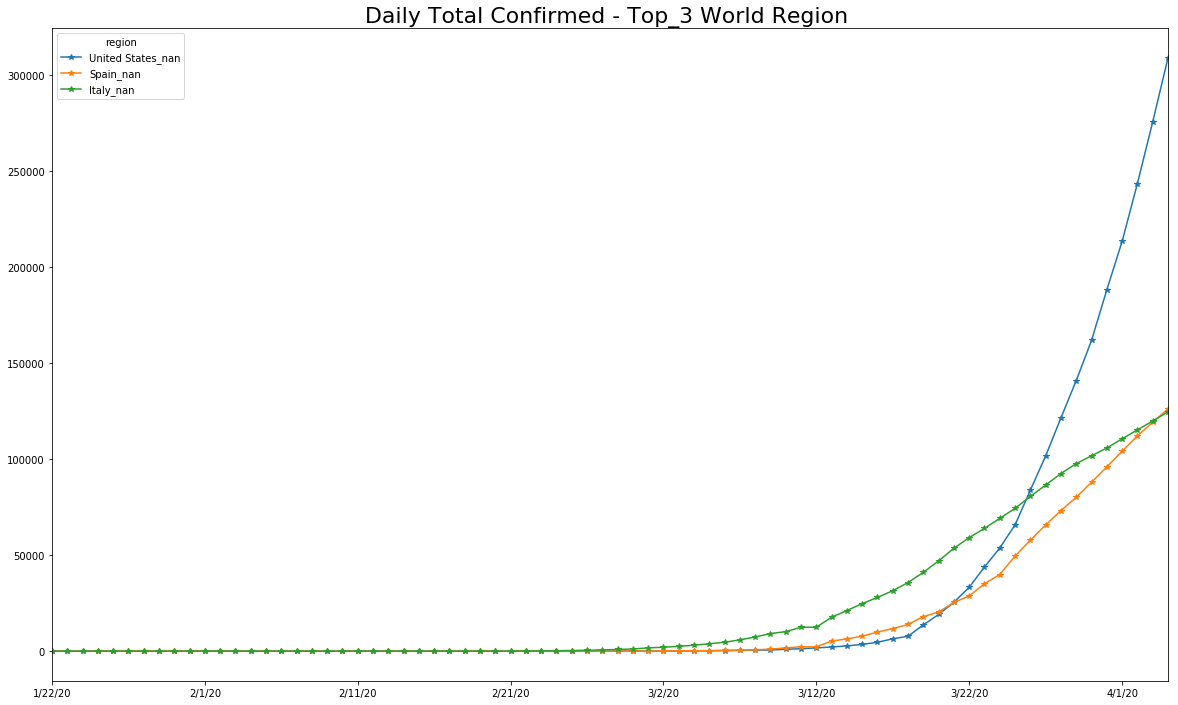

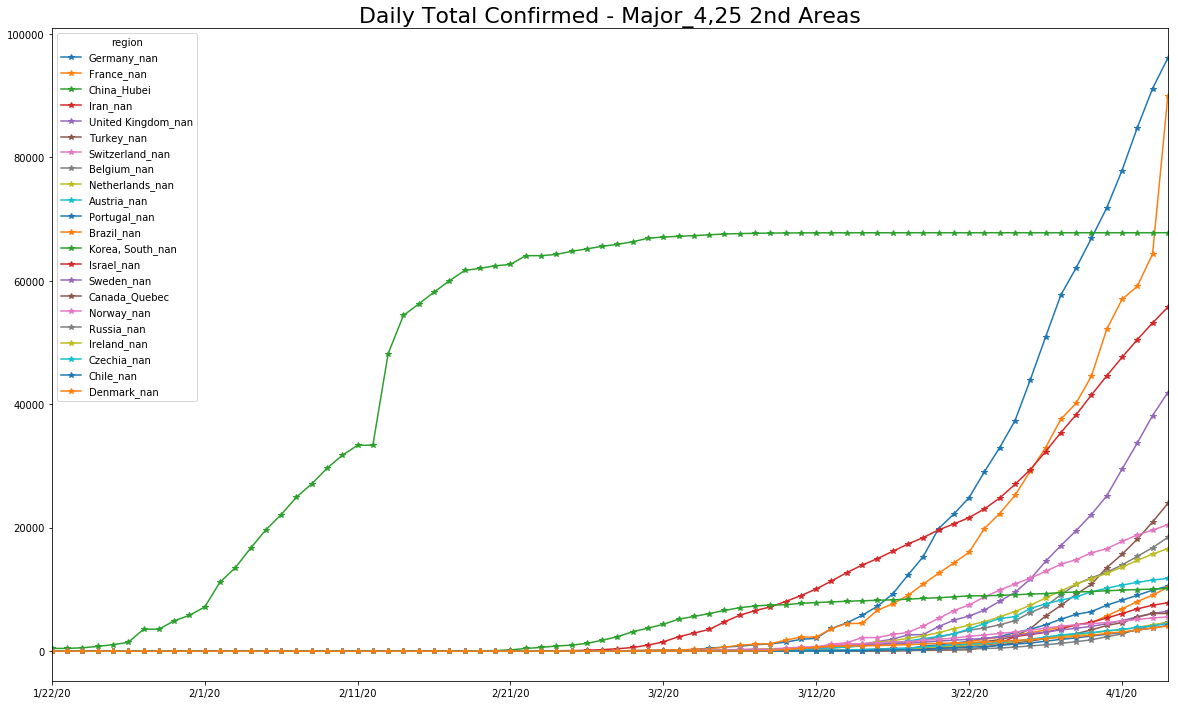

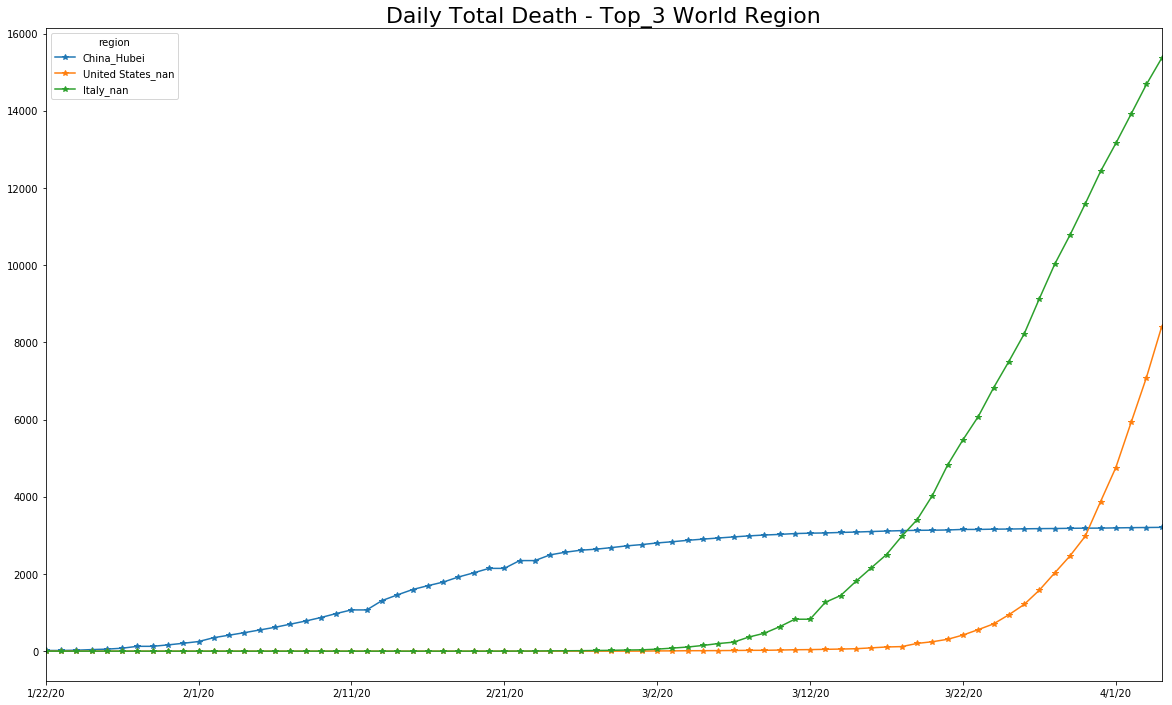

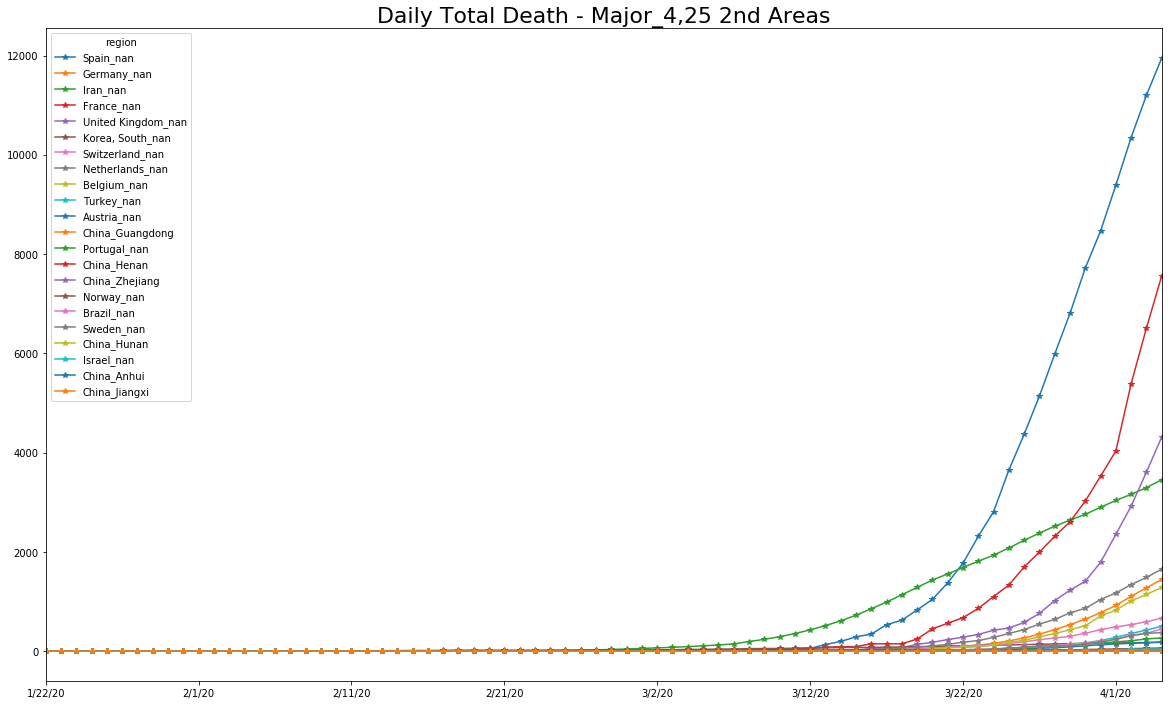

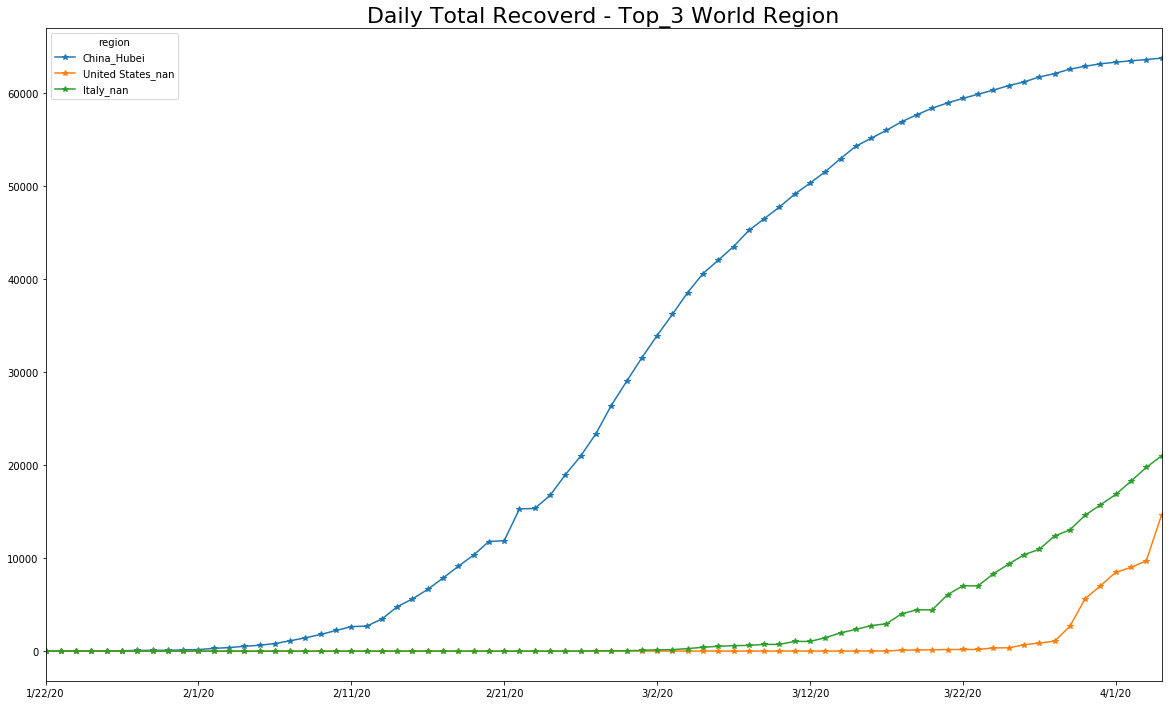

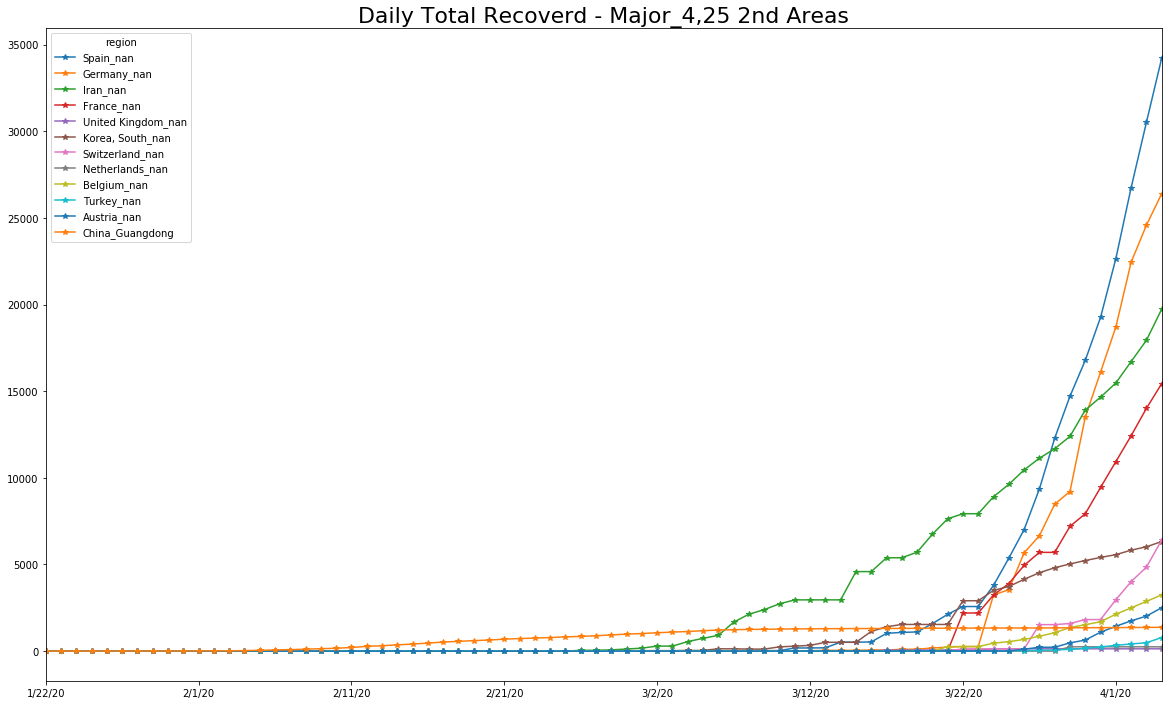

In [12]:
import matplotlib.pyplot as plt
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Death - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Total Death - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Recoverd - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:15].plot(marker='*',figsize=(20,12)).set_title('Daily Total Recoverd - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [13]:

#!pip install pyweatherbit

In [14]:

from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#api_key="30b114eb7ebb45069cd287adadf9d3b7" # joao@fuelbigdata.com
#api_key="257c03d853ec4a9db6bd4920be591f3c" # jpacerqueira.consult.bigdata@gmail.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090"

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [15]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'Italy_nan',
        'United States_nan',
        'Portugal_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Poland_nan',
        'United Kingdom_nan', 
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 'Belgium_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Taiwan*_nan',
        'Turkey_nan', 
        'Vietnam_nan',
       ]
#

#### Weather History

In [16]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

start_date_init='2020-04-03'
offset_days=0 # is h! #-1 to start yesterday pick today# API free-tier just picks one per api call!
max_days=2

w=pd.DataFrame(columns=['date','region','min','max'])
for h in range(0,max_days):
    offset_days=h
    start_date=pd.to_datetime(start_date_init)
    #
    end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
    start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
    prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
    prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
    #
    for i in range (1,len(confirmed)):
        if confirmed.iloc[i,vpos] not in my_train_list:
            continue
        if confirmed.iloc[i,vpos] in my_train_list:
            #
            # Clean JSON structure return from API Call
            jas=""
            jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
            if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                 or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                continue
            try:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
            except Exception:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
#        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan


In [17]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [18]:
w[:]

date                     region   min   max
0   2020/04/04  Australia_New South Wales  18.2  24.4
1   2020/04/04                Belgium_nan   3.9  12.8
2   2020/04/04             Canada_Ontario  -8.0   9.9
3   2020/04/04              China_Beijing   3.0  26.0
4   2020/04/04            China_Guangdong  16.0  18.0
5   2020/04/04            China_Hong Kong  16.9  18.9
6   2020/04/04                China_Hubei  10.8  19.0
7   2020/04/04                China_Macau  19.0  21.0
8   2020/04/04             China_Shanghai  11.8  19.8
9   2020/04/04                Finland_nan  -3.3  -1.1
10  2020/04/04                Finland_nan  -3.3  -1.1
11  2020/04/04                 France_nan   0.6  11.8
12  2020/04/04                Germany_nan   3.0   8.0
13  2020/04/04                  India_nan  23.0  36.0
14  2020/04/04                   Iran_nan   7.0  18.0
15  2020/04/04                   Iran_nan   7.0  18.0
16  2020/04/04                  Italy_nan   2.1  12.5
17  2020/04/04                  Japan_nan  -2.0  13.9
18  2020/04/04           Korea, South_nan   0.0  17.0
19  2020/04/04               Malaysia_nan  23.4  33.0
20  2020/04/04            Netherlands_nan   8.9  13.3
21  2020/04/04                 Norway_nan  -2.2  -2.2
22  2020/04/04            Philippines_nan  25.6  30.6
23  2020/04/04                 Poland_nan   1.7  10.6
24  2020/04/04               Portugal_nan   7.2  21.1
25  2020/04/04                 Russia_nan   1.0  14.0
26  2020/04/04              Singapore_nan  25.5  33.0
27  2020/04/04                  Spain_nan   5.8  17.5
28  2020/04/04                 Sweden_nan  -1.1   3.9
29  2020/04/04            Switzerland_nan   2.0   8.8
..         ...                        ...   ...   ...
40  2020/04/05            China_Hong Kong  16.9  20.6
41  2020/04/05                China_Hubei  11.0  21.0
42  2020/04/05                China_Macau  19.0  21.3
43  2020/04/05             China_Shanghai  11.1  23.1
44  2020/04/05                Finland_nan  -7.8   0.6
45  2020/04/05                Finland_nan  -7.8   0.6
46  2020/04/05                 France_nan   0.7  15.9
47  2020/04/05                Germany_nan   0.0  13.0
48  2020/04/05                  India_nan  22.0  36.1
49  2020/04/05                   Iran_nan   5.0  19.0
50  2020/04/05                   Iran_nan   5.0  19.0
51  2020/04/05                  Italy_nan   4.7  14.3
52  2020/04/05                  Japan_nan   1.6  16.0
53  2020/04/05           Korea, South_nan   2.0  14.0
54  2020/04/05               Malaysia_nan  23.5  35.0
55  2020/04/05            Netherlands_nan   6.1  17.2
56  2020/04/05                 Norway_nan  -6.1  -2.2
57  2020/04/05            Philippines_nan  25.6  31.7
58  2020/04/05                 Poland_nan  -1.7  10.6
59  2020/04/05               Portugal_nan  10.1  19.2
60  2020/04/05                 Russia_nan  -2.7   7.0
61  2020/04/05              Singapore_nan  27.0  34.0
62  2020/04/05                  Spain_nan   5.4  18.8
63  2020/04/05                 Sweden_nan  -4.4   3.3
64  2020/04/05            Switzerland_nan   1.8  10.9
65  2020/04/05                Taiwan*_nan  13.7  19.0
66  2020/04/05                 Turkey_nan   1.1  14.4
67  2020/04/05         United Kingdom_nan   5.0  10.0
68  2020/04/05          United States_nan   0.6   5.3
69  2020/04/05                Vietnam_nan  24.7  32.0

[70 rows x 4 columns]

In [16]:

# ################## Forecast Weather With API - Already Done
# #forecast = api.get_forecast(lat=lat, lon=lon)

# w_forecast=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
# for i in range (0,len(confirmed)):
#     jas=api.get_forecast(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3]).json
#     jas=json_normalize(jas['data'])[['datetime','min_temp','max_temp']]
#     try:
#       w_forecast_temp=jas
#       w_forecast_temp['region']=confirmed.iloc[i,confirmed.shape[1]-1]
#     except Exception:
#       w_forecast_temp=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
#     w_forecast=w_forecast.append(w_forecast_temp)
# w_forecast=w_forecast[['datetime','region','min_temp','max_temp']]
# w_forecast.columns = ['date', 'region', 'min', 'max']
# w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%Y-%m-%d')

## Kalman Filter With R

In [19]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan and Feb < 20/02 as
### they are too in the Past and model no longuer trains in China Hubei

ts=ts[29:]
ts_d=ts_d[29:]
ts_rec=ts_rec[29:]

In [20]:
ts[:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
2/20/20                0            0            0            0           0   
2/21/20                0            0            0            0           0   
2/22/20                0            0            0            0           0   
2/23/20                0            0            0            0           0   
2/24/20                1            0            0            0           0   
2/25/20                1            0            1            0           0   
2/26/20                1            0            1            0           0   
2/27/20                1            0            1            0           0   
2/28/20                1            0            1            0           0   
2/29/20                1            0            1            0           0   
3/1/20                 1            0            1            0           0   
3/2/20                 1            0            3            1           0   
3/3/20                 1            0            5            1           0   
3/4/20                 1            0           12            1           0   
3/5/20                 1            0           12            1           0   
3/6/20                 1            0           17            1           0   
3/7/20                 1            0           17            1           0   
3/8/20                 4            0           19            1           0   
3/9/20                 4            2           20            1           0   
3/10/20                5           10           20            1           0   
3/11/20                7           12           20            1           0   
3/12/20                7           23           24            1           0   
3/13/20                7           33           26            1           0   
3/14/20               11           38           37            1           0   
3/15/20               16           42           48            1           0   
3/16/20               21           51           54            2           0   
3/17/20               22           55           60           39           0   
3/18/20               22           59           74           39           0   
3/19/20               22           64           87           53           0   
3/20/20               24           70           90           75           1   
3/21/20               24           76          139           88           2   
3/22/20               40           89          201          113           2   
3/23/20               40          104          230          133           3   
3/24/20               74          123          264          164           3   
3/25/20               84          146          302          188           3   
3/26/20               94          174          367          224           4   
3/27/20              110          186          409          267           4   
3/28/20              110          197          454          308           5   
3/29/20              120          212          511          334           7   
3/30/20              170          223          584          370           7   
3/31/20              174          243          716          376           7   
4/1/20               237          259          847          390           8   
4/2/20               273          277          986          428           8   
4/3/20               281          304         1171          439           8   
4/4/20               299          333         1251          466          10   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
2/20/20                        0              0            0   
2/21/20                        0              0            0   
2/22/20                        0              0            0   
2/23/20                        0              0            0   
2/24/20                        0             

In [21]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [22]:
#!pip install rpy2


In [23]:
import rpy2
%load_ext rpy2.ipython

In [24]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')


NULL


In [25]:
%%R
Sys.setenv(TZ='GMT')
Sys.timezone()


[1] "GMT"


In [26]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [27]:
p=%R pred_all

In [28]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

In [29]:
temp[:]

date           region  confirmed     Y          X      X2
0     2020-02-20  Afghanistan_nan          0   0.0   0.000000  0.0000
1     2020-02-21  Afghanistan_nan          0   0.0   0.000000  0.0000
2     2020-02-22  Afghanistan_nan          0   0.0   0.000000  0.0000
3     2020-02-23  Afghanistan_nan          0   0.0   0.000000  0.0000
4     2020-02-24  Afghanistan_nan          1   1.0   0.000000  0.0000
5     2020-02-25  Afghanistan_nan          1   1.0   0.829164  0.4896
6     2020-02-26  Afghanistan_nan          1   1.0   1.173575  0.5572
7     2020-02-27  Afghanistan_nan          1   1.0   1.308386  0.4961
8     2020-02-28  Afghanistan_nan          1   1.0   1.335020  0.3932
9     2020-02-29  Afghanistan_nan          1   1.0   1.302954  0.2833
10    2020-03-01  Afghanistan_nan          1   1.0   1.242967  0.1841
11    2020-03-02  Afghanistan_nan          1   1.0   1.175804  0.1045
12    2020-03-03  Afghanistan_nan          1   1.0   1.114305  0.0468
13    2020-03-04  Afghanistan_nan          1   1.0   1.064808  0.0093
14    2020-03-05  Afghanistan_nan          1   1.0   1.028990 -0.0120
15    2020-03-06  Afghanistan_nan          1   1.0   1.005717 -0.0215
16    2020-03-07  Afghanistan_nan          1   1.0   0.992530 -0.0233
17    2020-03-08  Afghanistan_nan          4   4.0   0.986636 -0.0209
18    2020-03-09  Afghanistan_nan          4   4.0   2.836291  0.9669
19    2020-03-10  Afghanistan_nan          5   5.0   3.989300  1.3483
20    2020-03-11  Afghanistan_nan          7   7.0   5.219561  1.6796
21    2020-03-12  Afghanistan_nan          7   7.0   7.073759  2.2633
22    2020-03-13  Afghanistan_nan          7   7.0   8.046721  2.2391
23    2020-03-14  Afghanistan_nan         11  11.0   8.408578  1.8960
24    2020-03-15  Afghanistan_nan         16  16.0  10.860422  2.7454
25    2020-03-16  Afghanistan_nan         21  21.0  15.266484  4.4301
26    2020-03-17  Afghanistan_nan         22  22.0  20.797066  6.3095
27    2020-03-18  Afghanistan_nan         22  22.0  24.378445  6.7038
28    2020-03-19  Afghanistan_nan         22  22.0  25.927900  5.9242
29    2020-03-20  Afghanistan_nan         24  24.0  26.170656  4.6367
...          ...              ...        ...   ...        ...     ...
11884 2020-03-07     Zimbabwe_nan          0   0.0   0.000000  0.0000
11885 2020-03-08     Zimbabwe_nan          0   0.0   0.000000  0.0000
11886 2020-03-09     Zimbabwe_nan          0   0.0   0.000000  0.0000
11887 2020-03-10     Zimbabwe_nan          0   0.0   0.000000  0.0000
11888 2020-03-11     Zimbabwe_nan          0   0.0   0.000000  0.0000
11889 2020-03-12     Zimbabwe_nan          0   0.0   0.000000  0.0000
11890 2020-03-13     Zimbabwe_nan          0   0.0   0.000000  0.0000
11891 2020-03-14     Zimbabwe_nan          0   0.0   0.000000  0.0000
11892 2020-03-15     Zimbabwe_nan          0   0.0   0.000000  0.0000
11893 2020-03-16     Zimbabwe_nan          0   0.0   0.000000  0.0000
11894 2020-03-17     Zimbabwe_nan          0   0.0   0.000000  0.0000
11895 2020-03-18     Zimbabwe_nan          0   0.0   0.000000  0.0000
11896 2020-03-19     Zimbabwe_nan          0   0.0   0.000000  0.0000
11897 2020-03-20     Zimbabwe_nan          1   1.0   0.000000  0.0000
11898 2020-03-21     Zimbabwe_nan          3   3.0   0.616903  0.3278
11899 2020-03-22     Zimbabwe_nan          3   3.0   2.234549  1.1089
11900 2020-03-23     Zimbabwe_nan          3   3.0   3.205785  1.3599
11901 2020-03-24     Zimbabwe_nan          3   3.0   3.690772  1.2924
11902 2020-03-25     Zimbabwe_nan          3   3.0   3.846214  1.0660
11903 2020-03-26     Zimbabwe_nan          3   3.0   3.803870  0.7886
11904 2020-03-27     Zimbabwe_nan          5   5.0   3.662827  0.5251
11905 2020-03-28     Zimbabwe_nan          7   7.0   4.724024  0.9634
11906 2020-03-29     Zimbabwe_nan          7   7.0   6.561613  1.7094
11907 2020-03-30     Zimbabwe_nan          7   7.0   7.601308  1.8531
11908 2020-03-31     Zimbabwe_nan          8   8.0   8.064276  1.6560
11909 2020-04-01     Z

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [30]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

#w_1_total=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_total.csv', sep=',', encoding='latin1')
#w_1_total['date']=pd.to_datetime(w_1_total['date'],format='%Y/%m/%d')
w_v2_v2=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

In [31]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2) # w_1_total.append(w_v2) #
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [32]:
w_in_model=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [33]:
w_in_model.tail(10)

date       region   min   max
5573 2020-03-10  Vietnam_nan  22.1  26.1
5574 2020-03-11  Vietnam_nan  22.2  27.4
5575 2020-03-12  Vietnam_nan  23.6  28.2
5576 2020-03-13  Vietnam_nan  22.9  28.4
5577 2020-03-14  Vietnam_nan  24.6  31.0
5578 2020-04-01  Vietnam_nan  25.7  33.0
5579 2020-04-02  Vietnam_nan  25.3  30.0
5580 2020-04-03  Vietnam_nan  25.0  33.0
5581 2020-04-04  Vietnam_nan  26.0  32.0
5582 2020-04-05  Vietnam_nan  24.7  32.0

### Build Train Set Data Structure

In [34]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [35]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2] +1)/(t.iloc[i-2,2]-1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2] +1)/(t.iloc[i-4,2]-1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2] +1)/(t.iloc[i-8,2]-1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=((train['last_day'] +1)/((train['population'] +1) *10000))
#
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2)
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)
#
train=train.merge(w_total,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [36]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
5     2020-02-25  Afghanistan_nan          1             1             1   
6     2020-02-26  Afghanistan_nan          1             0             1   
7     2020-02-27  Afghanistan_nan          1             0             1   
8     2020-02-28  Afghanistan_nan          1             0             0   
9     2020-02-29  Afghanistan_nan          1             0             0   
10    2020-03-01  Afghanistan_nan          1             0             0   
11    2020-03-02  Afghanistan_nan          1             0             0   
12    2020-03-03  Afghanistan_nan          1             0             0   
13    2020-03-04  Afghanistan_nan          1             0             0   
14    2020-03-05  Afghanistan_nan          1             0             0   
15    2020-03-06  Afghanistan_nan          1             0             0   
16    2020-03-07  Afghanistan_nan          1             0             0   
17    2020-03-08  Afghanistan_nan          4             0             0   
18    2020-03-09  Afghanistan_nan          4             3             3   
19    2020-03-10  Afghanistan_nan          5             0             3   
20    2020-03-11  Afghanistan_nan          7             1             4   
21    2020-03-12  Afghanistan_nan          7             2             3   
22    2020-03-13  Afghanistan_nan          7             0             3   
23    2020-03-14  Afghanistan_nan         11             0             2   
24    2020-03-15  Afghanistan_nan         16             4             4   
25    2020-03-16  Afghanistan_nan         21             5             9   
26    2020-03-17  Afghanistan_nan         22             5            14   
27    2020-03-18  Afghanistan_nan         22             1            11   
28    2020-03-19  Afghanistan_nan         22             0             6   
29    2020-03-20  Afghanistan_nan         24             0             1   
30    2020-03-21  Afghanistan_nan         24             2             2   
31    2020-03-22  Afghanistan_nan         40             0             2   
32    2020-03-23  Afghanistan_nan         40            16            18   
33    2020-03-24  Afghanistan_nan         74             0            16   
34    2020-03-25  Afghanistan_nan         84            34            50   
...          ...              ...        ...           ...           ...   
11946 2020-03-23       Zambia_nan          3             1             1   
11947 2020-03-24       Zambia_nan          3             0             1   
11948 2020-03-25       Zambia_nan         12             0             1   
11949 2020-03-26       Zambia_nan         16             9             9   
11950 2020-03-27       Zambia_nan         22             4            13   
11951 2020-03-28       Zambia_nan         28             6            19   
11952 2020-03-29       Zambia_nan         29             6            16   
11953 2020-03-30       Zambia_nan         35             1            13   
11954 2020-03-31       Zambia_nan         35             6            13   
11955 2020-04-01       Zambia_nan         36             0             7   
11956 2020-04-02       Zambia_nan         39             1             7   
11957 2020-04-03       Zambia_nan         39             3             4   
11958 2020-04-04       Zambia_nan         39             0             4   
11959 2020-04-05       Zambia_nan          0             0             3   
11990 2020-03-21     Zimbabwe_nan          3             1             1   
11991 2020-03-22     Zimbabwe_nan          3             2             3   
11992 2020-03-23     Zimbabwe_nan          3             0             3   
11993 2020-03-24     Zimbabwe_nan          3             0             2   
11994 2020-03-25     Zimbabwe_nan          3             0             0   
11995 2020-03-26     Zimbabwe_nan          3             0             0   
11996 2020-03-27     Zimbabwe_nan          5             0  

In [37]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [38]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]

date        region  confirmed  1_day_change  3_day_change  \
46    2020-02-20   Albania_nan          0             0             0   
47    2020-02-21   Albania_nan          0             0             0   
48    2020-02-22   Albania_nan          0             0             0   
49    2020-02-23   Albania_nan          0             0             0   
50    2020-02-24   Albania_nan          0             0             0   
51    2020-02-25   Albania_nan          0             0             0   
52    2020-02-26   Albania_nan          0             0             0   
53    2020-02-27   Albania_nan          0             0             0   
54    2020-02-28   Albania_nan          0             0             0   
55    2020-02-29   Albania_nan          0             0             0   
56    2020-03-01   Albania_nan          0             0             0   
57    2020-03-02   Albania_nan          0             0             0   
58    2020-03-03   Albania_nan          0             0             0   
59    2020-03-04   Albania_nan          0             0             0   
60    2020-03-05   Albania_nan          0             0             0   
61    2020-03-06   Albania_nan          0             0             0   
62    2020-03-07   Albania_nan          0             0             0   
63    2020-03-08   Albania_nan          0             0             0   
64    2020-03-09   Albania_nan          2             0             0   
65    2020-03-10   Albania_nan         10             2             2   
66    2020-03-11   Albania_nan         12             8            10   
67    2020-03-12   Albania_nan         23             2            12   
68    2020-03-13   Albania_nan         33            11            21   
69    2020-03-14   Albania_nan         38            10            23   
70    2020-03-15   Albania_nan         42             5            26   
71    2020-03-16   Albania_nan         51             4            19   
72    2020-03-17   Albania_nan         55             9            18   
73    2020-03-18   Albania_nan         59             4            17   
74    2020-03-19   Albania_nan         64             4            17   
75    2020-03-20   Albania_nan         70             5            13   
...          ...           ...        ...           ...           ...   
11976 2020-03-07  Zimbabwe_nan          0             0             0   
11977 2020-03-08  Zimbabwe_nan          0             0             0   
11978 2020-03-09  Zimbabwe_nan          0             0             0   
11979 2020-03-10  Zimbabwe_nan          0             0             0   
11980 2020-03-11  Zimbabwe_nan          0             0             0   
11981 2020-03-12  Zimbabwe_nan          0             0             0   
11982 2020-03-13  Zimbabwe_nan          0             0             0   
11983 2020-03-14  Zimbabwe_nan          0             0             0   
11984 2020-03-15  Zimbabwe_nan          0             0             0   
11985 2020-03-16  Zimbabwe_nan          0             0             0   
11986 2020-03-17  Zimbabwe_nan          0             0             0   
11987 2020-03-18  Zimbabwe_nan          0             0             0   
11988 2020-03-19  Zimbabwe_nan          0             0             0   
11989 2020-03-20  Zimbabwe_nan          1             0             0   
11990 2020-03-21  Zimbabwe_nan          3             1             1   
11991 2020-03-22  Zimbabwe_nan          3             2             3   
11992 2020-03-23  Zimbabwe_nan          3             0             3   
11993 2020-03-24  Zimbabwe_nan          3             0             2   
11994 2020-03-25  Zimbabwe_nan          3             0             0   
11995 2020-03-26  Zimbabwe_nan          3             0             0   
11996 2020-03-27  Zimbabwe_nan          5             0             0   
11997 2020-03-28  Zimbabwe_nan          7             2             2   
11998 2020-03-29  Zimbabwe_nan          7             2             4 

## Kalman 1 day Prediction with Evaluation

        region           mse          rmse          mae
148  Italy_nan  3.740650e+08  19340.760589  3957.955556


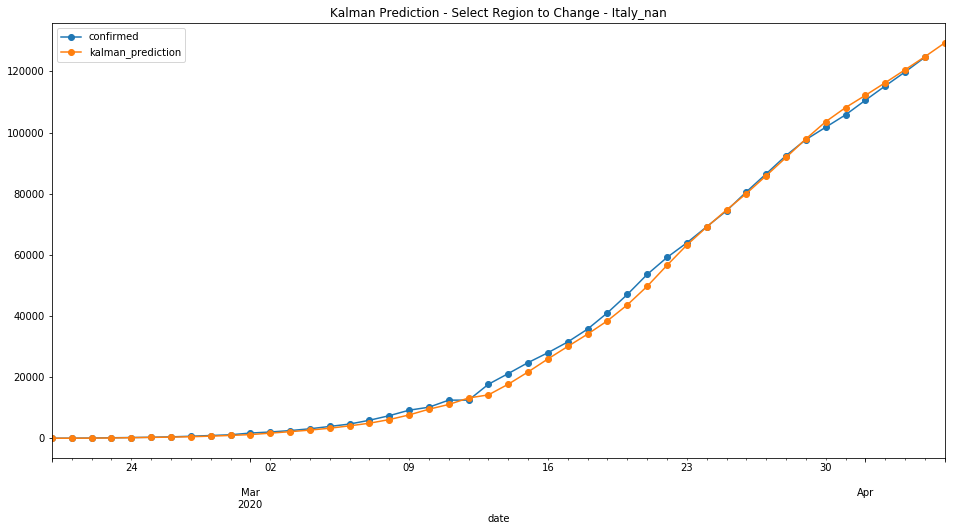

In [39]:
### JOAO - ERROR - ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
# Select region
region='Italy_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse          rmse          mae
222  Spain_nan  4.069087e+08  20171.977393  4241.044444


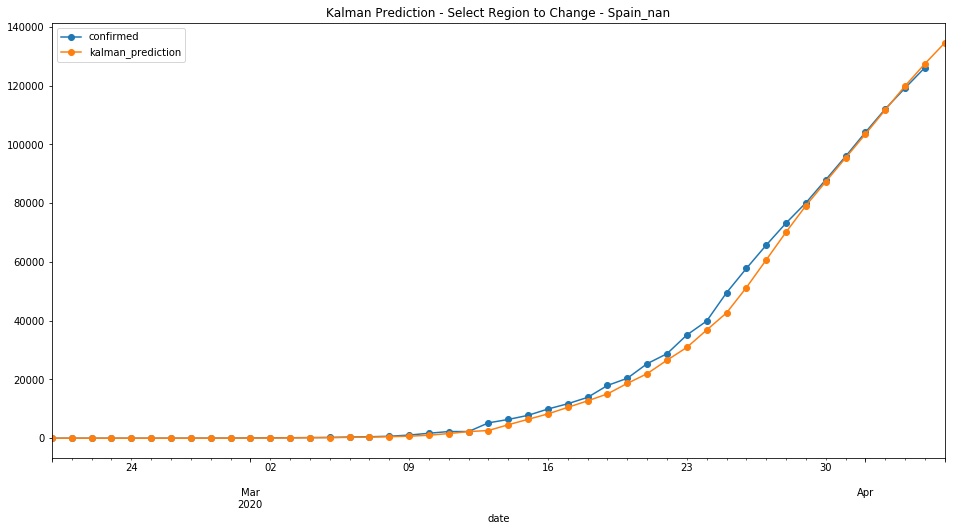

In [40]:
# Select region
region='Spain_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse         rmse          mae
250  United Kingdom_nan  4.612407e+07  6791.470302  1589.711111


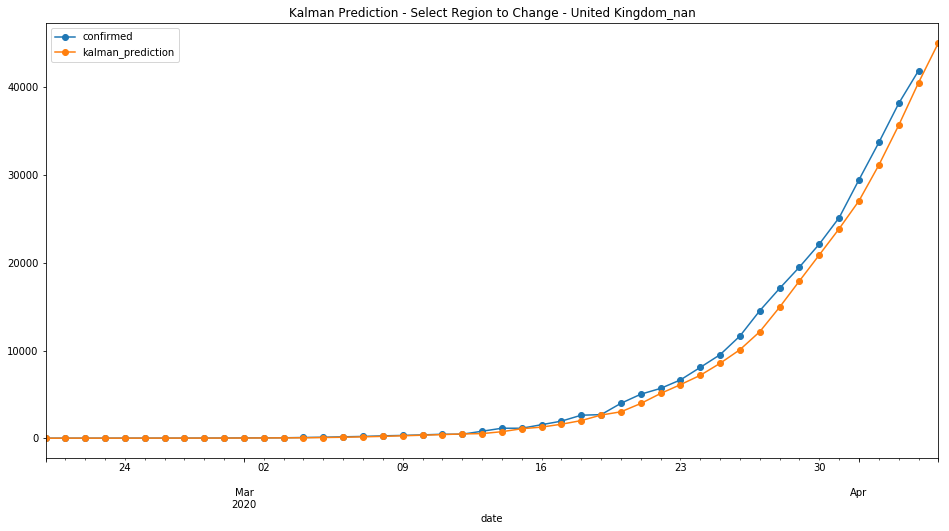

In [41]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                region           mse          rmse           mae
251  United States_nan  2.465031e+09  49649.078332  11655.222222


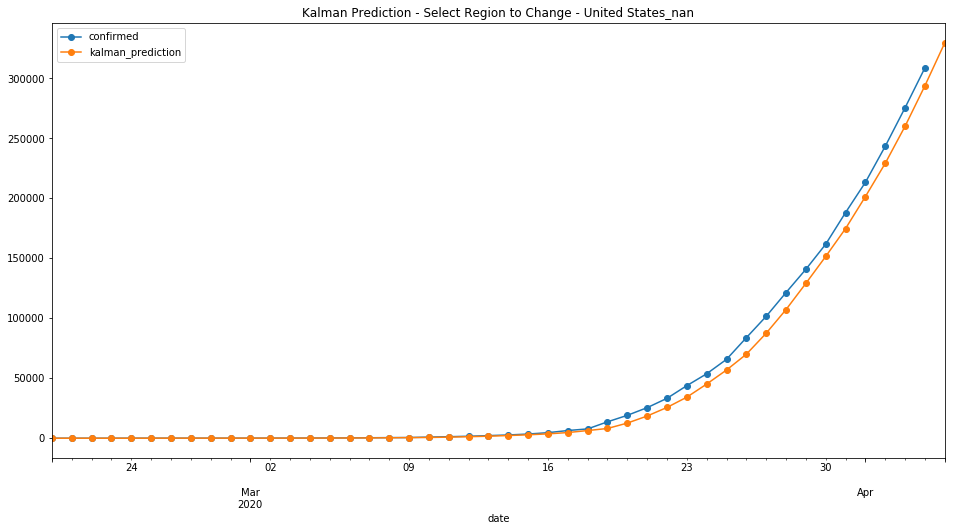

In [42]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

          region           mse          rmse          mae
129  Germany_nan  2.344524e+08  15311.839424  3236.311111


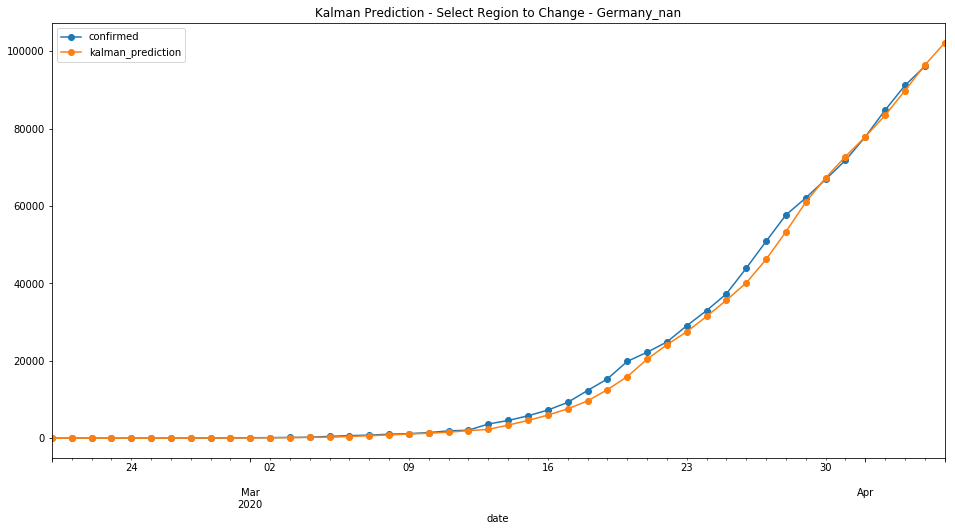

In [43]:
# Select region
region='Germany_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse          rmse          mae
125  France_nan  1.777087e+08  13330.742516  3147.044444


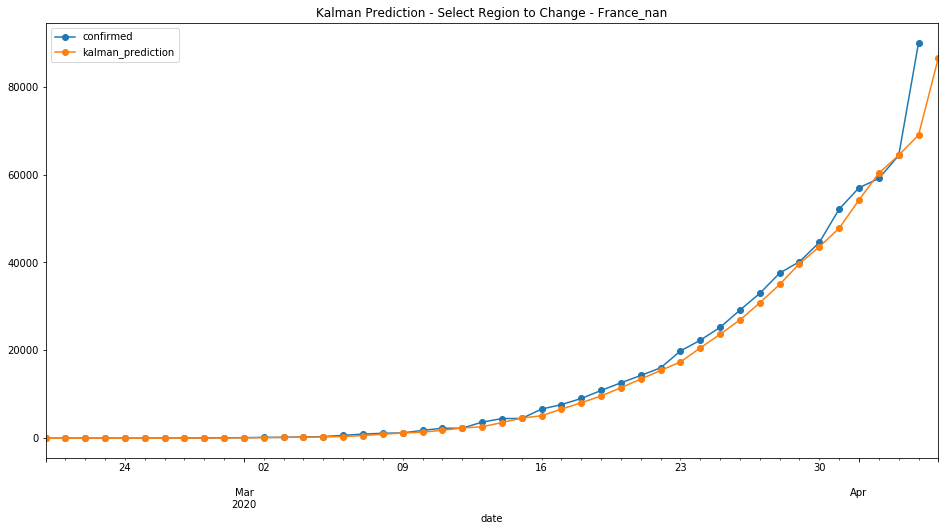

In [44]:
# Select region
region='France_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

           region           mse         rmse         mae
203  Portugal_nan  2.930167e+06  1711.773122  379.933333


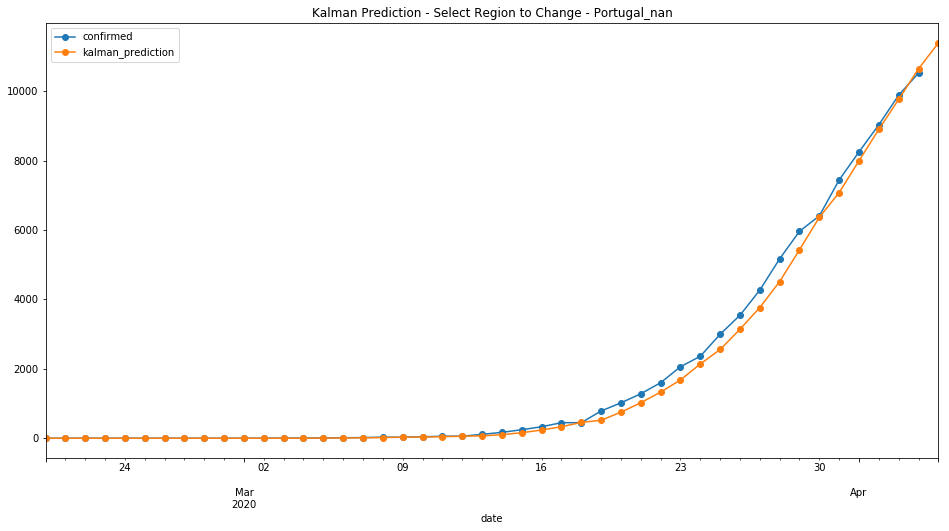

In [45]:
# Select region
region='Portugal_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

              region           mse         rmse    mae
227  Switzerland_nan  1.041665e+07  3227.483158  683.8


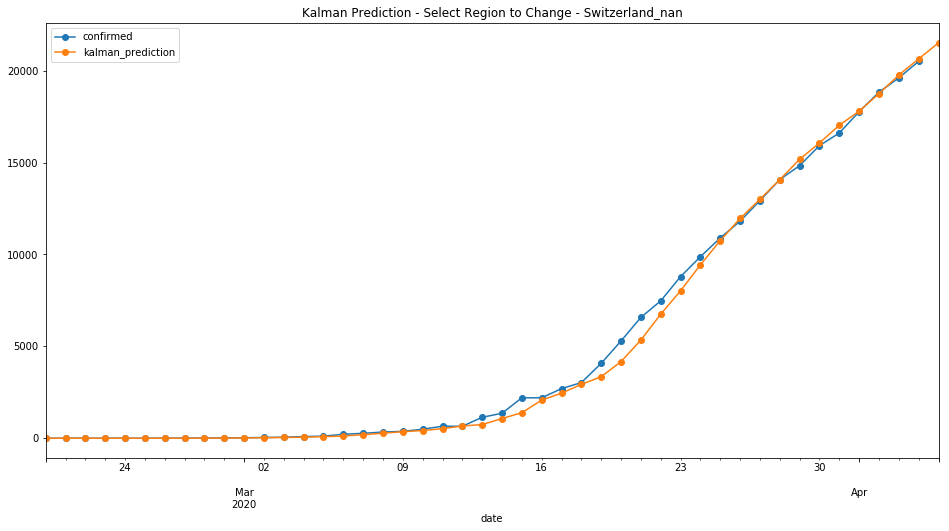

In [46]:
# Select region
region='Switzerland_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region        mse         rmse         mae
16  Austria_nan  3560184.4  1886.845092  449.066667


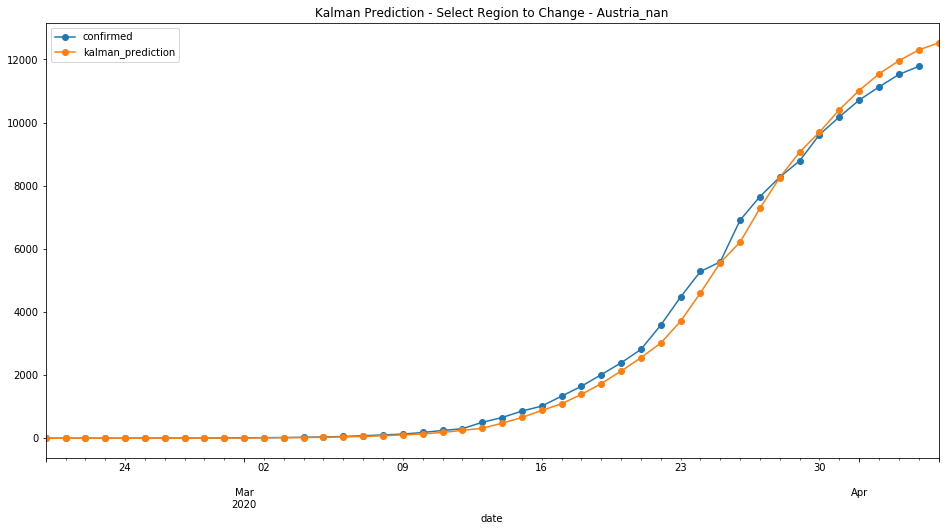

In [47]:
# Select region
region='Austria_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse         rmse         mae
236  Turkey_nan  1.529727e+07  3911.172405  955.488889


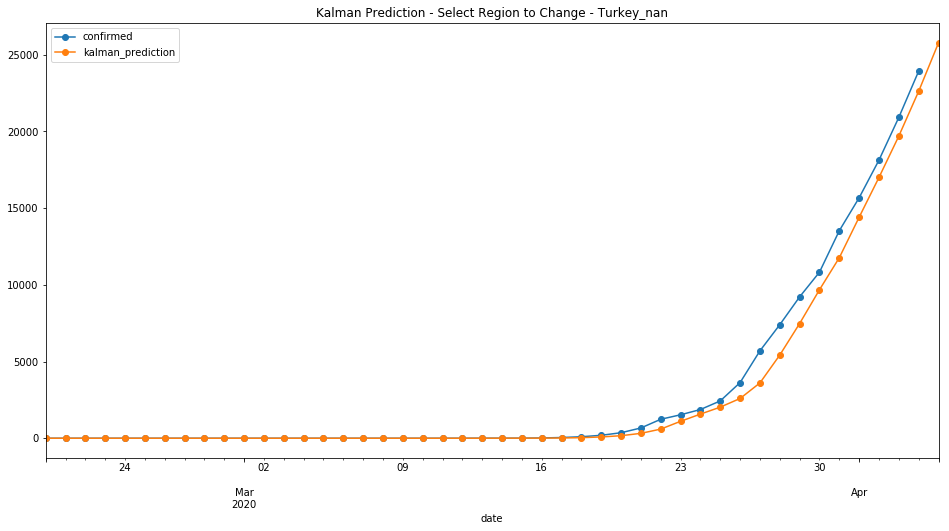

In [48]:
# Select region
region='Turkey_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

               region        mse         rmse    mae
154  Korea, South_nan  2412824.2  1553.326817  405.8


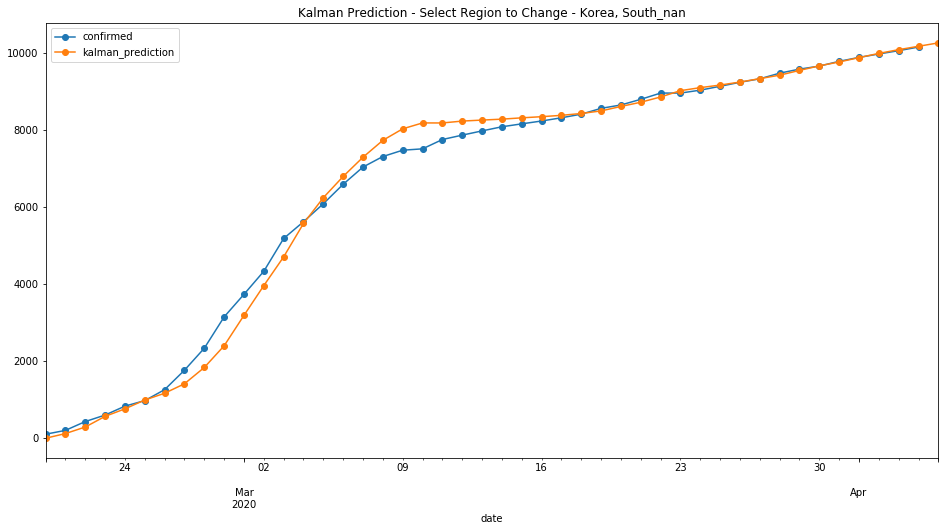

In [49]:
# Select region
region='Korea, South_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [50]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='7G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp9hddexqs
  JVM stdout: /tmp/tmp9hddexqs/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp9hddexqs/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         02 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 5 months and 9 days !!!
H2O cluster name:           H2O_from_python_unknownUser_z5brjg
H2O cluster total nodes:    1
H2O cluster free memory:    7 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [51]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'Italy_nan',
        'United States_nan',
        'Portugal_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Poland_nan',
        'United Kingdom_nan', 
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 'Belgium_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
         'Taiwan*_nan',
         'Turkey_nan', 
         'Vietnam_nan',
       ]
#

In [52]:
train=train.fillna(0) 

###train_df=train[train['date']<'2020-02-17']
###boots=train_df[train_df['date']>='2020-02-14'] # some bootstrap to give more weight for recent days
###train_df=train_df.append([boots[boots['date']>='2020-02-14']]*1000,ignore_index=True)
###train_df_hubei=train_df[train_df['region']=='China_Hubei']
###test=train[train['date']>='2020-02-17']
###test=test[test['date']<'2020-02-19']
###
### Joao - Training  progression - When growth happened 2020/03/18 to 2020/03/21
train_df=train[train['date']<'2020-03-29']
boots=train_df[train_df['date']>='2020-03-28'] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>='2020-04-03']]*100,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>='2020-03-29']
test=test[test['date']<'2020-04-06']
test_v2=test[test['region'].isin(region_to_train)]

In [53]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'kalman_prediction',
            'infected_rate', 'min', 'max'
          ]

In [54]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [55]:
pred2.iloc[175:195]

0  confirmed       date        region
175     54.0          0 2020-04-05  Barbados_nan
176     93.0         94 2020-03-29   Belarus_nan
177     93.0        152 2020-03-30   Belarus_nan
178    169.0        152 2020-03-31   Belarus_nan
179    162.0        163 2020-04-01   Belarus_nan
180    189.0        304 2020-04-02   Belarus_nan
181    362.0        351 2020-04-03   Belarus_nan
182    412.0        440 2020-04-04   Belarus_nan
183    552.0          0 2020-04-05   Belarus_nan
184  10967.0      10836 2020-03-29   Belgium_nan
185  12708.0      11899 2020-03-30   Belgium_nan
186  13742.0      12775 2020-03-31   Belgium_nan
187  14216.0      13964 2020-04-01   Belgium_nan
188  15178.0      15348 2020-04-02   Belgium_nan
189  16713.0      16770 2020-04-03   Belgium_nan
190  18289.0      18431 2020-04-04   Belgium_nan
191  20327.0          0 2020-04-05   Belgium_nan
192     -8.0          2 2020-03-29    Belize_nan
193     -9.0          3 2020-03-30    Belize_nan
194    -11.0          3 2020-03-31    Belize_nan

In [56]:
pred2.iloc[220:240]

0  confirmed       date                      region
220  123.0        123 2020-04-02                 Bolivia_nan
221  127.0        132 2020-04-03                 Bolivia_nan
222  138.0        139 2020-04-04                 Bolivia_nan
223  144.0          0 2020-04-05                 Bolivia_nan
224  281.0        323 2020-03-29  Bosnia and Herzegovina_nan
225  376.0        368 2020-03-30  Bosnia and Herzegovina_nan
226  410.0        420 2020-03-31  Bosnia and Herzegovina_nan
227  483.0        459 2020-04-01  Bosnia and Herzegovina_nan
228  505.0        533 2020-04-02  Bosnia and Herzegovina_nan
229  593.0        579 2020-04-03  Bosnia and Herzegovina_nan
230  632.0        624 2020-04-04  Bosnia and Herzegovina_nan
231  681.0          0 2020-04-05  Bosnia and Herzegovina_nan
232    7.0          0 2020-03-29                Botswana_nan
233    7.0          3 2020-03-30                Botswana_nan
234   12.0          4 2020-03-31                Botswana_nan
235   -5.0          4 2020-04-01                Botswana_nan
236   -0.0          4 2020-04-02                Botswana_nan
237   -3.0          4 2020-04-03                Botswana_nan
238   -3.0          4 2020-04-04                Botswana_nan
239   -3.0          0 2020-04-05                Botswana_nan

In [57]:

train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time

training_columns = ['region','1_day_change', '3_day_change', '7_day_change', '1_day_change_rate', '3_day_change_rate',
                    '7_day_change_rate', 'last_day', 'kalman_prediction','infected_rate', 'min', 'max'
                   ]                 
# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Italian Model

model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=17)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2)

test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [58]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF

variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         4.823306e+13           1.000000    0.376478
1            last_day         3.497641e+13           0.725154    0.273004
2       infected_rate         1.744612e+13           0.361705    0.136174
3              region         1.362830e+13           0.282551    0.106374
4        7_day_change         7.329786e+12           0.151966    0.057212
5        1_day_change         2.749552e+12           0.057006    0.021461
6        3_day_change         2.671264e+12           0.055382    0.020850
7                 max         3.406494e+11           0.007063    0.002659
8                 min         3.137228e+11           0.006504    0.002449
9   1_day_change_rate         1.748452e+11           0.003625    0.001365
10  7_day_change_rate         1.361819e+11           0.002823    0.001063
11  3_day_change_rate         1.167477e+11           0.002420    0.000911

In [59]:
# # Model performance
# performance = model_hubei.model_performance(test_data=test_h20_hubei)
# # Model Create Predictions
# pred=model_hubei.predict(test_h20_hubei);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
# pred['confirmed']=test_hubei['confirmed'].values
# pred['date']=test_hubei['date'].values
# pred['region']=test_hubei['region'].values

# pred2=model.predict(test_h20);pred2=pred2.as_data_frame(); pred2=round(pred2)
# pred2['confirmed']=test['confirmed'].values
# pred2['date']=test['date'].values
# pred2['region']=test['region'].values
# pred=pred.append(pred2)

## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


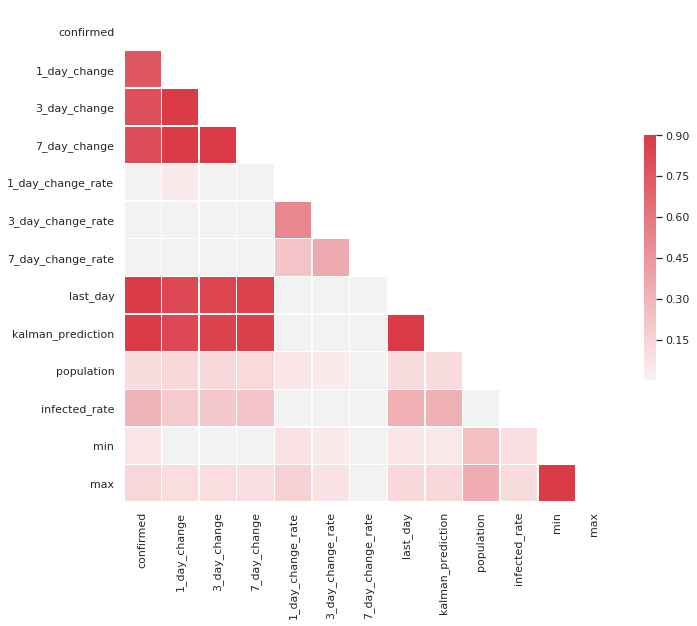

In [60]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [61]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.756802
3_day_change         0.784583
7_day_change         0.802109
1_day_change_rate    0.034494
3_day_change_rate    0.014115
7_day_change_rate    0.006378
last_day             0.909747
kalman_prediction    0.911929
population           0.110191
infected_rate        0.303486
min                  0.061138
max                  0.129848
Name: confirmed, dtype: float64


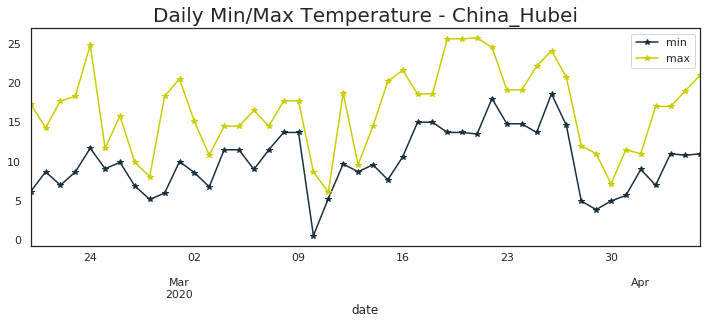

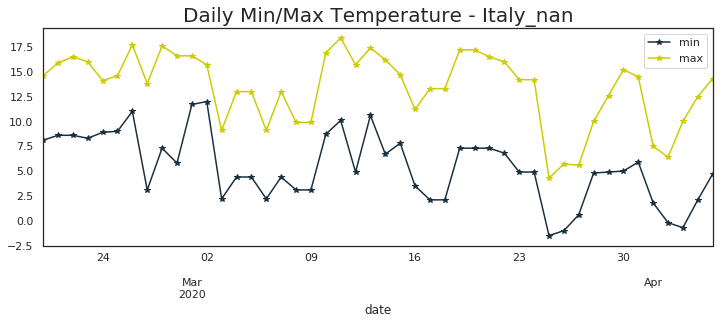

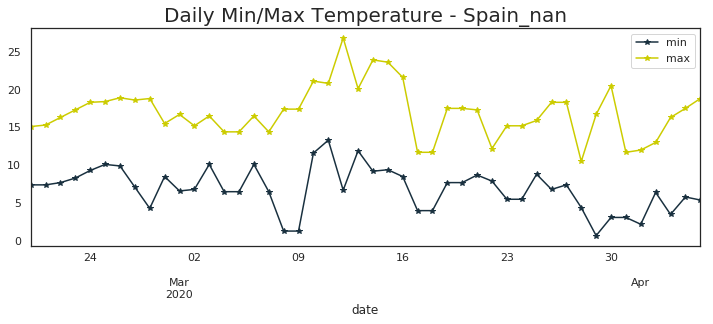

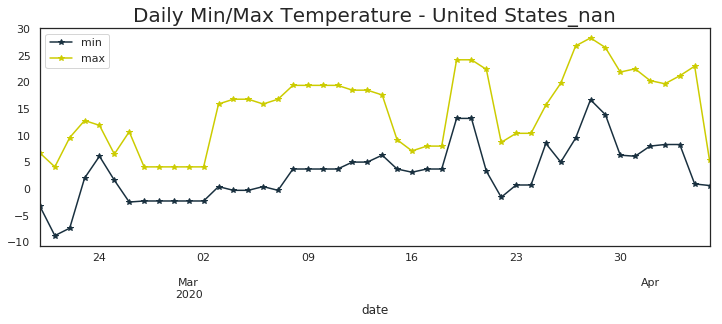

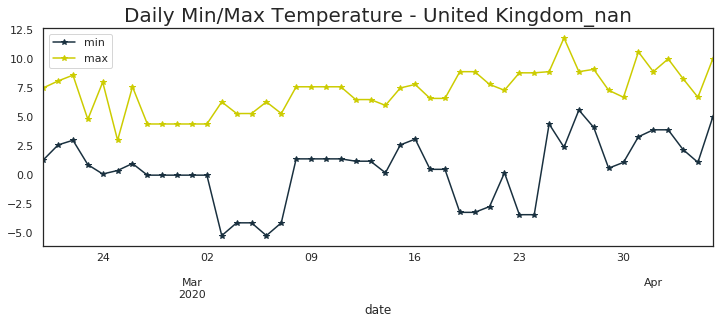

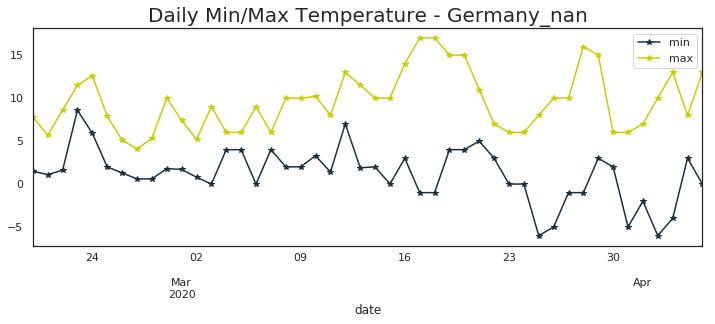

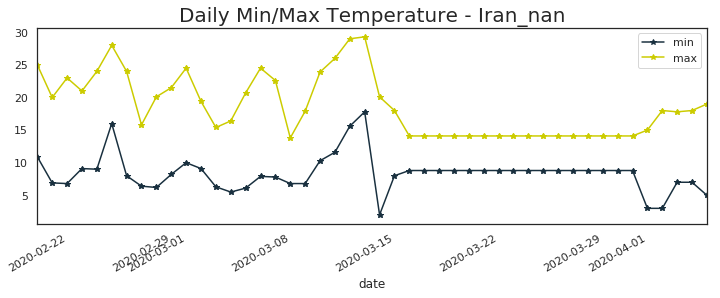

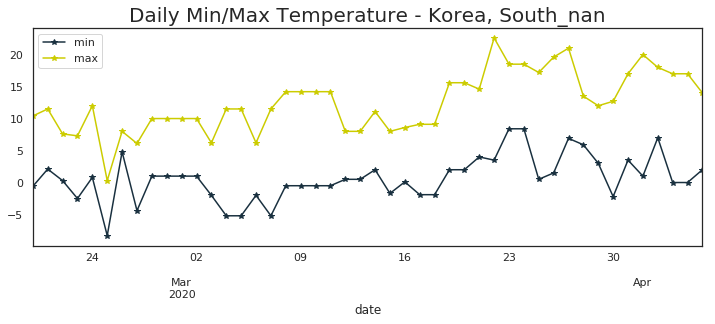

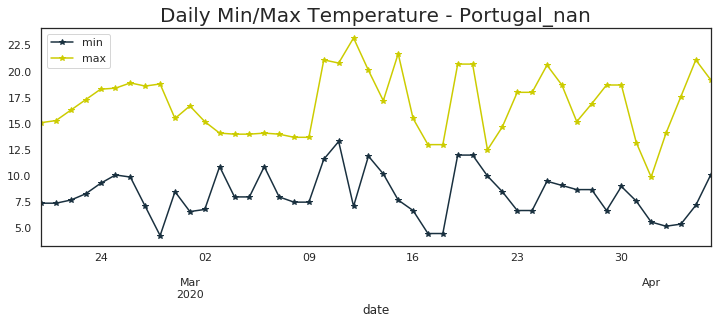

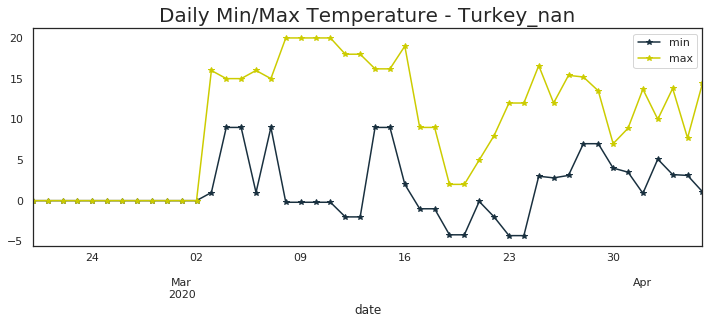

In [62]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['China_Hubei','Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan','Korea, South_nan','Portugal_nan','Turkey_nan']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [63]:
avg_temp=train[['region','confirmed','min','max']]  # from 17-02-20 to 16-03-2020
avg_temp=avg_temp.groupby(by='region').mean()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                                min        max
region                                        
China_Hubei               10.036957  16.691304
United States_nan          3.108696  14.800000
Italy_nan                  5.382609  13.428261
Spain_nan                  6.845652  16.980435
Germany_nan                1.176087   9.563043
Iran_nan                   8.367391  18.636957
France_nan                 1.982609  11.945652
United Kingdom_nan         0.508696   7.254348
Korea, South_nan           0.643478  12.460870
Switzerland_nan           -3.169565   3.197826
Netherlands_nan            3.200000   8.139130
Belgium_nan                3.493478  10.515217
Turkey_nan                 1.454348   9.817391
Austria_nan               -5.006522   1.836957
Portugal_nan               8.269565  16.871739
Norway_nan                -7.652174  -0.610870
Brazil_nan                23.069565  31.076087
Sweden_nan                -3.445652   3.721739
China_Guangdong         

### Kalman X Days Ahead Prediction

In [64]:
%%R

#install.packages('reshape')

NULL


In [65]:
%%R
require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
### JOAO
#### for (i in 1:30) { # Set i days prediction
#####for (i in 1:45) { # Set i days prediction
for (i in 1:75) { # Set i days prediction    
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [66]:
all_new=%R all_new

In [67]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

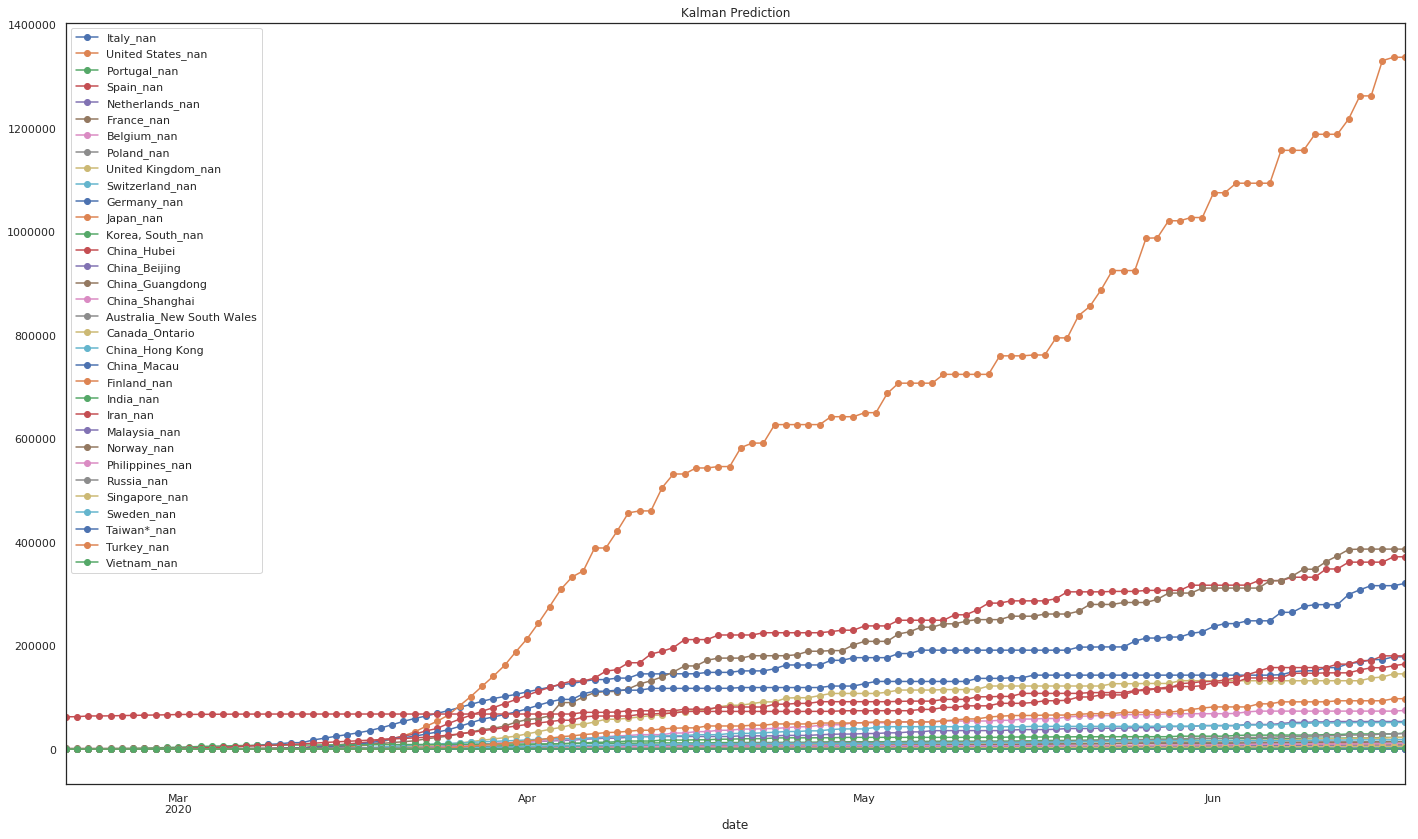

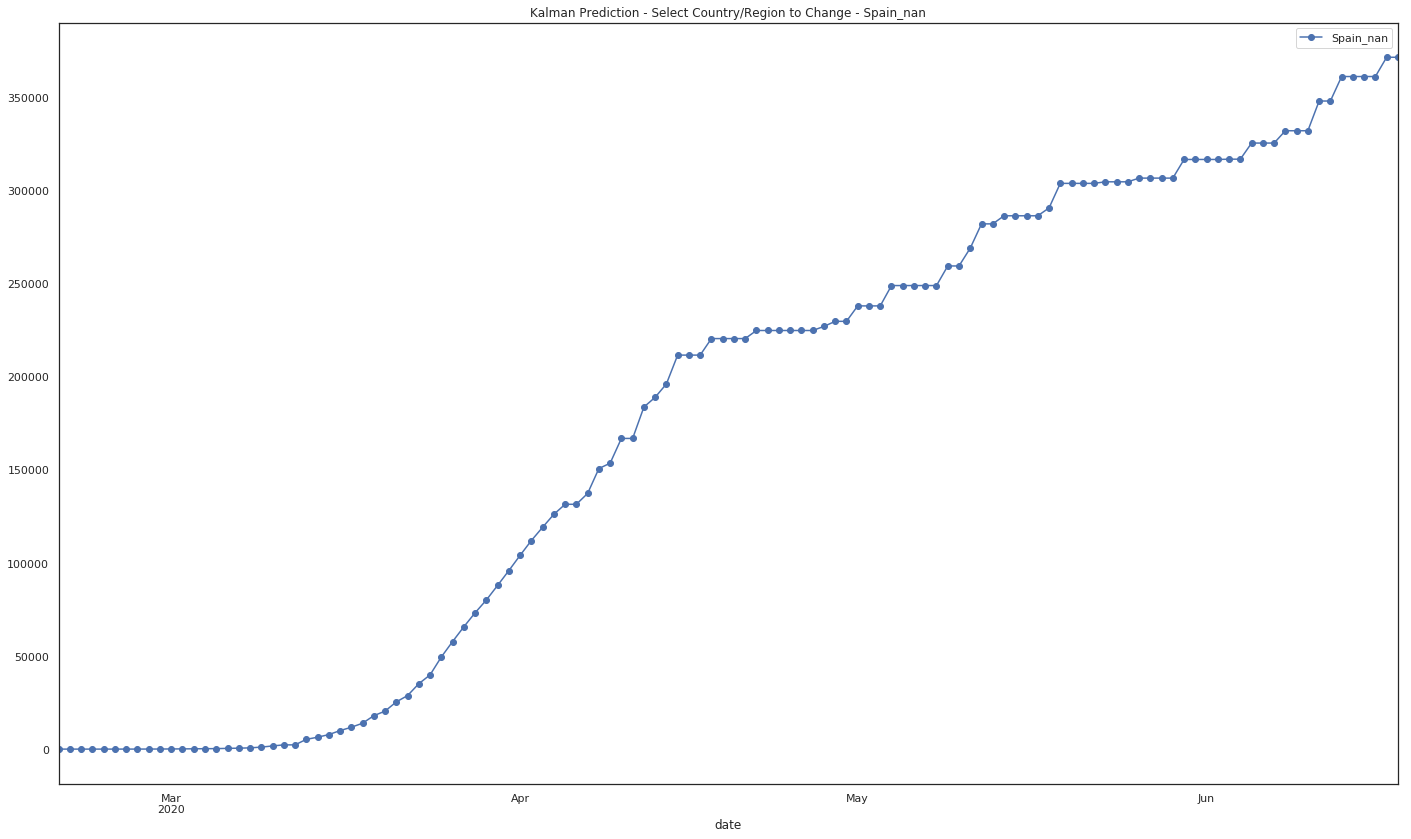

In [68]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
#p_kalman2=all_new[['date','China_Hubei']]
p_kalman2=all_new[['date','Spain_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


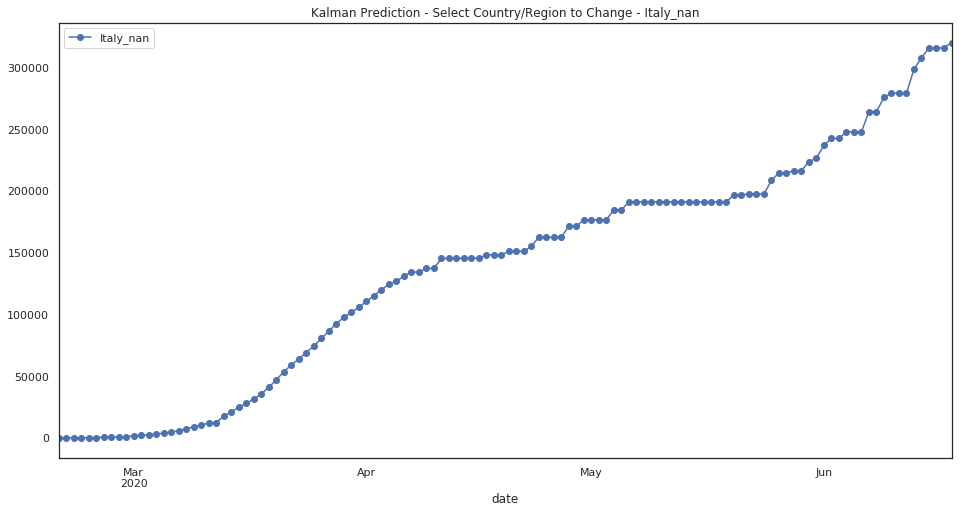

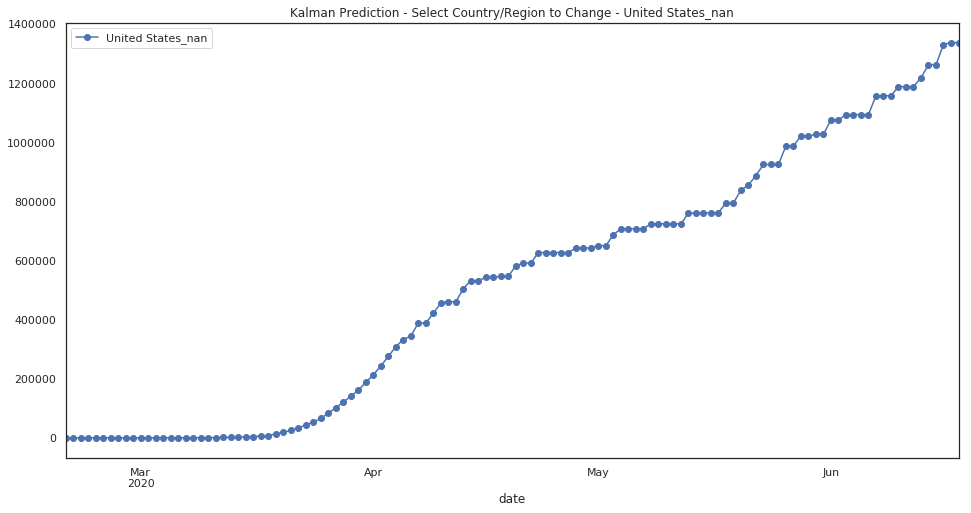

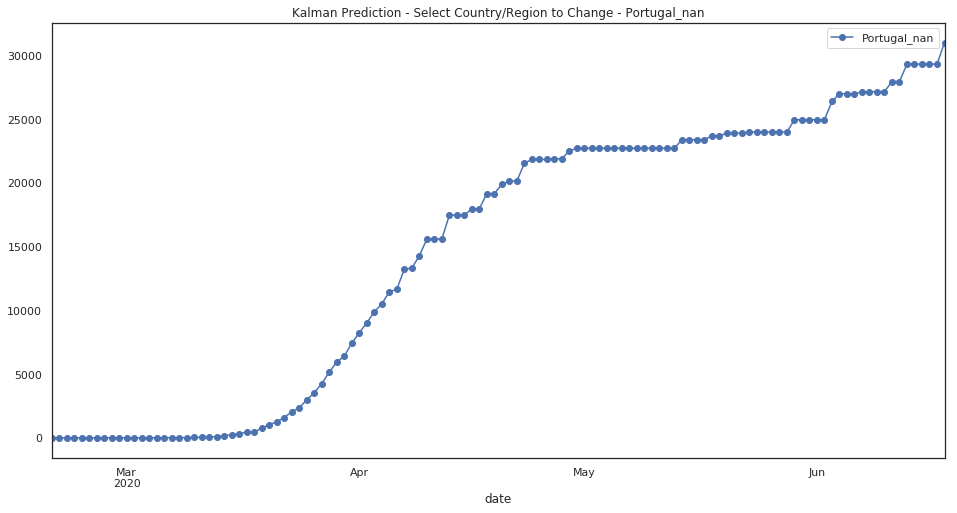

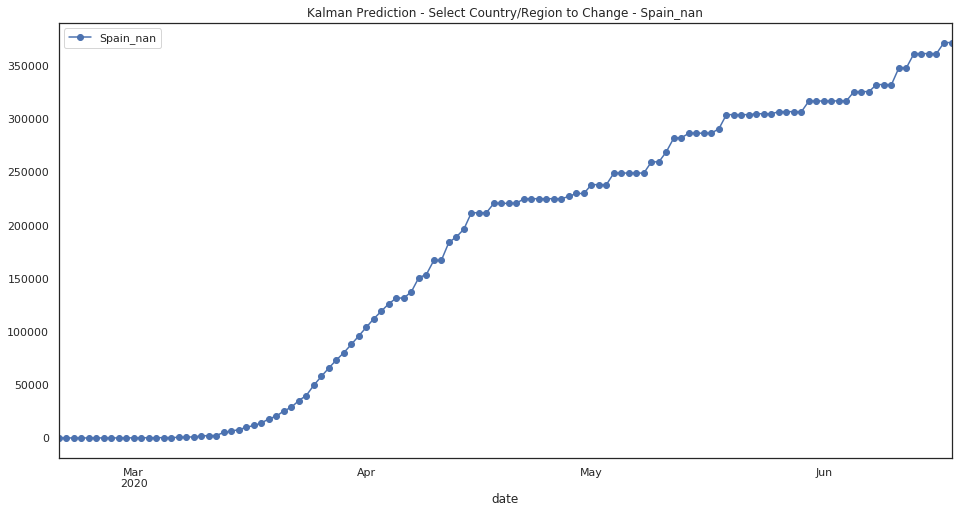

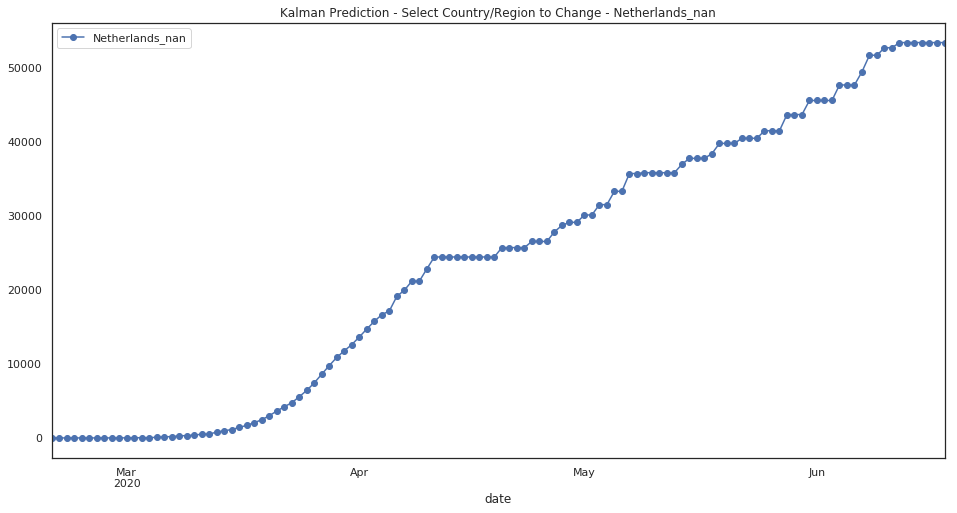

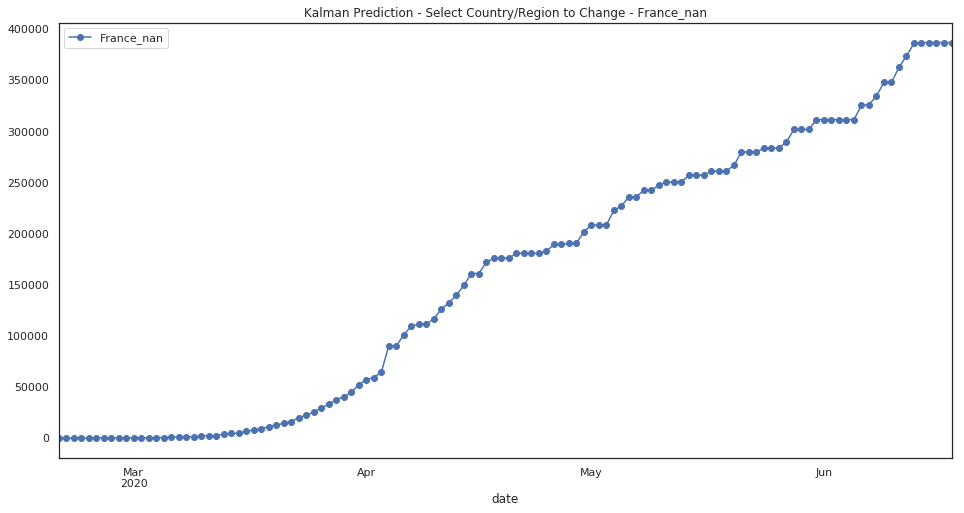

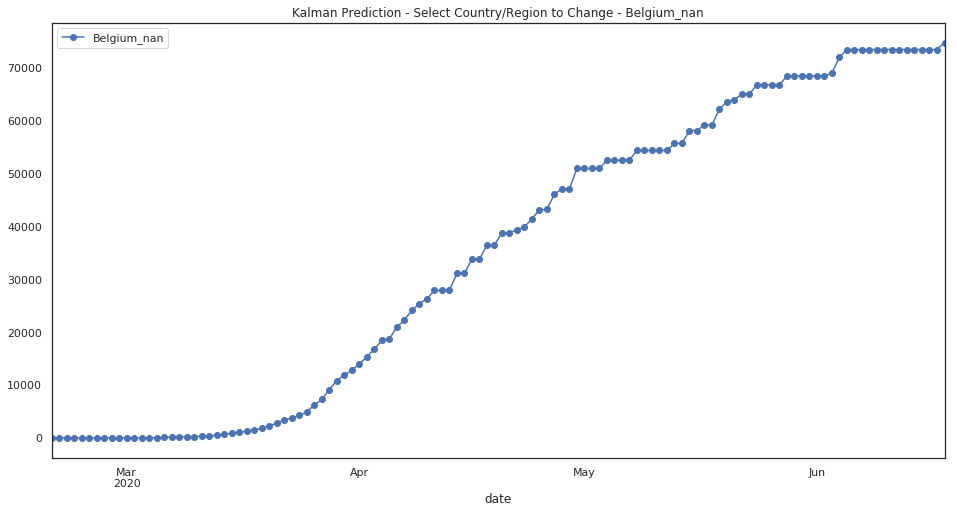

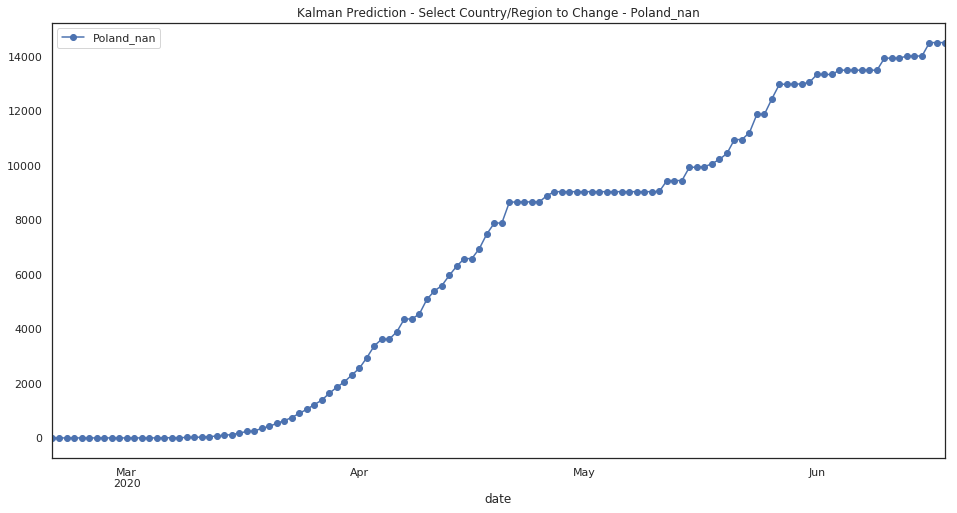

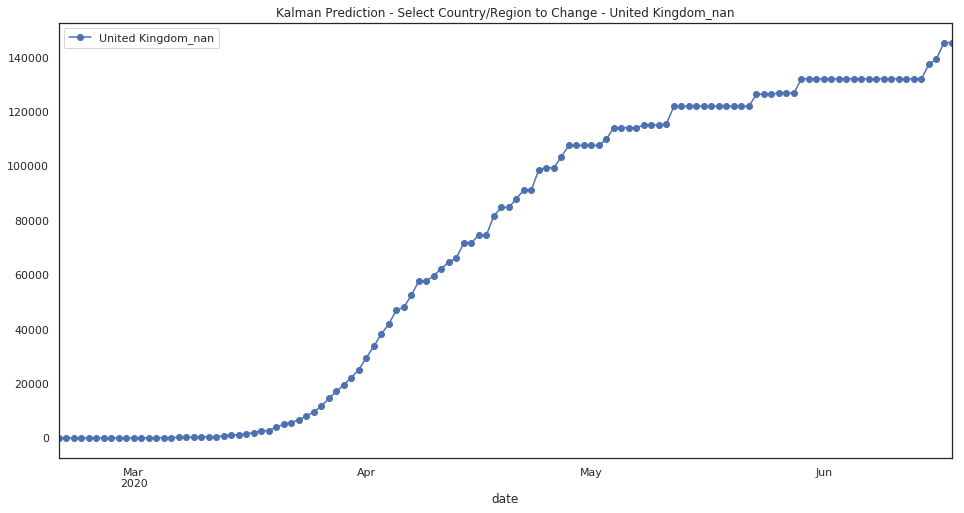

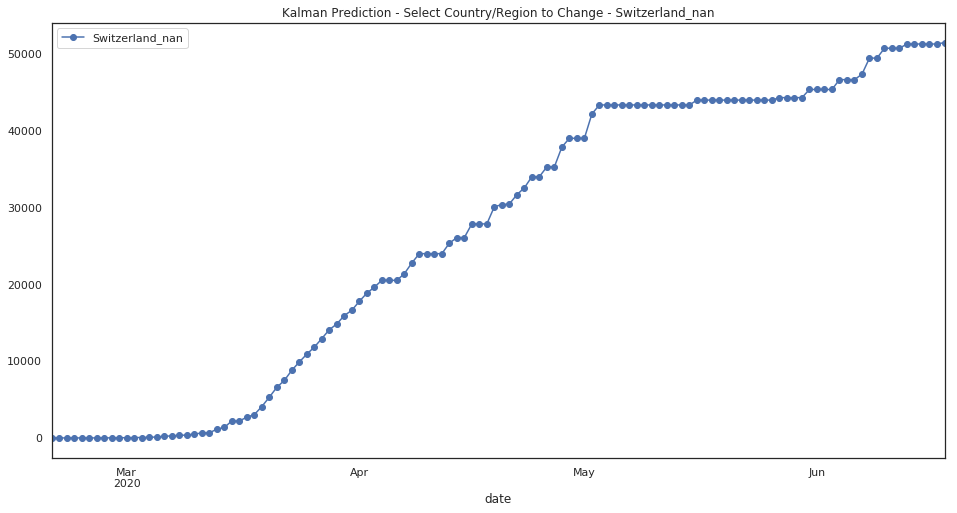

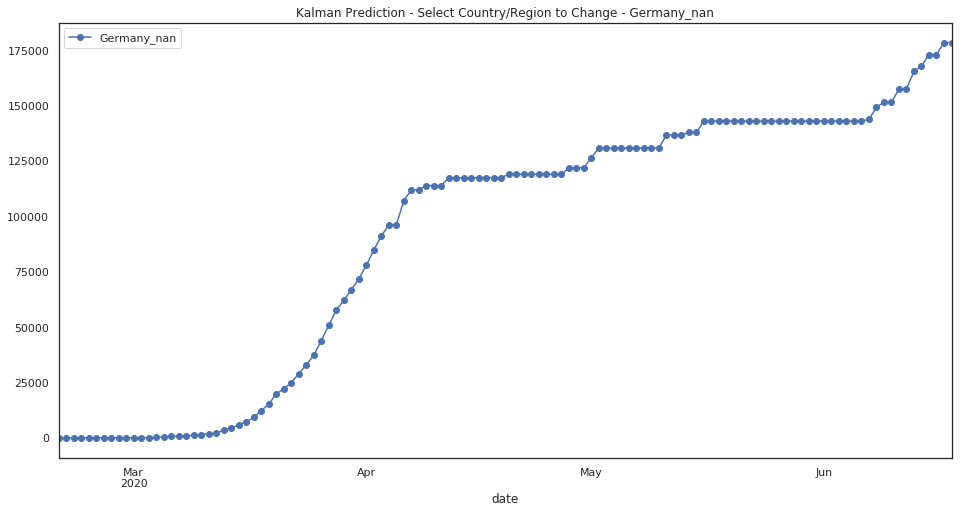

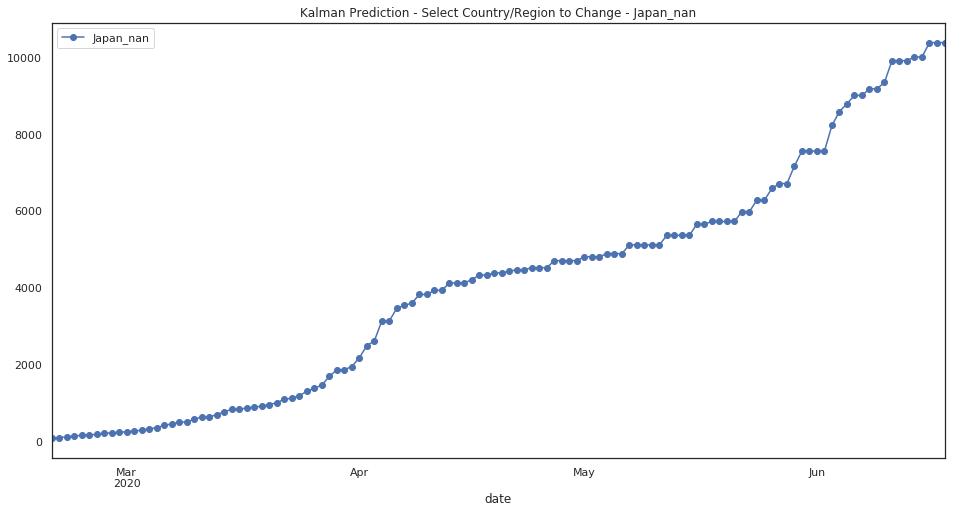

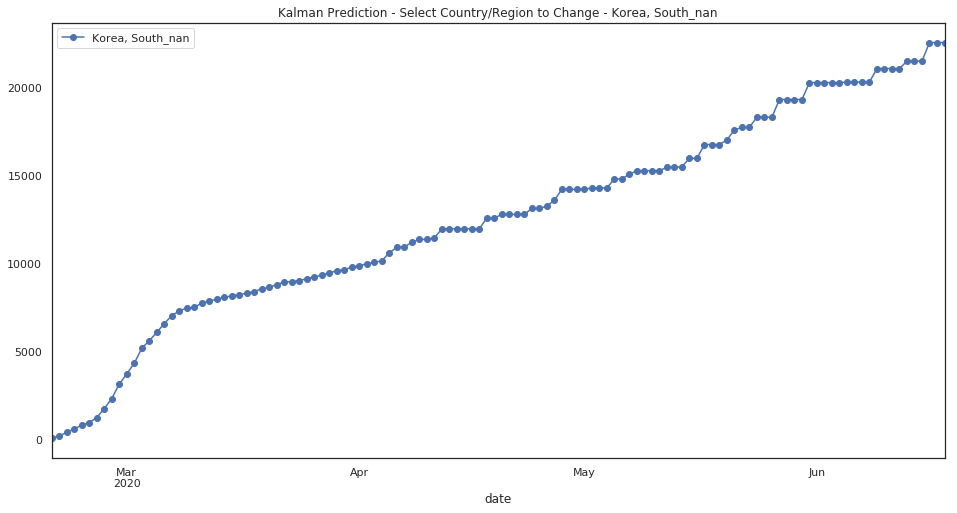

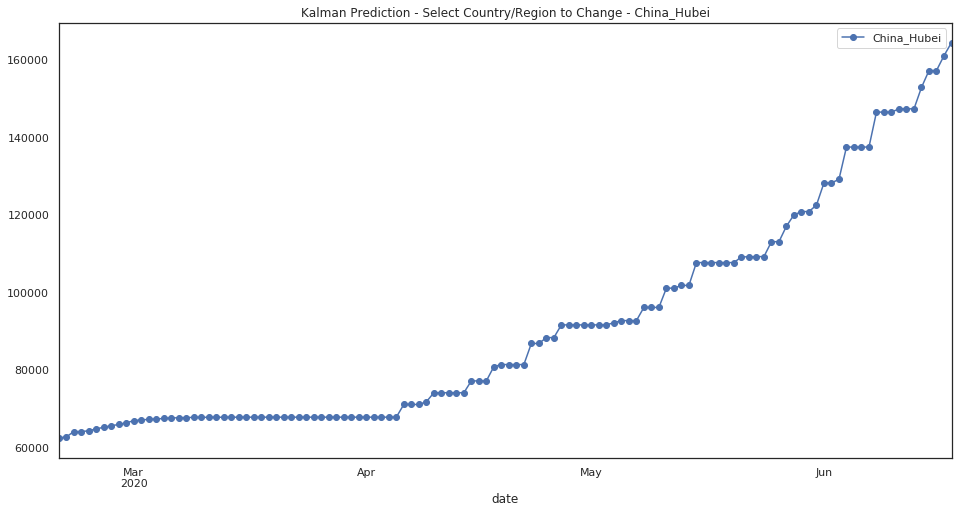

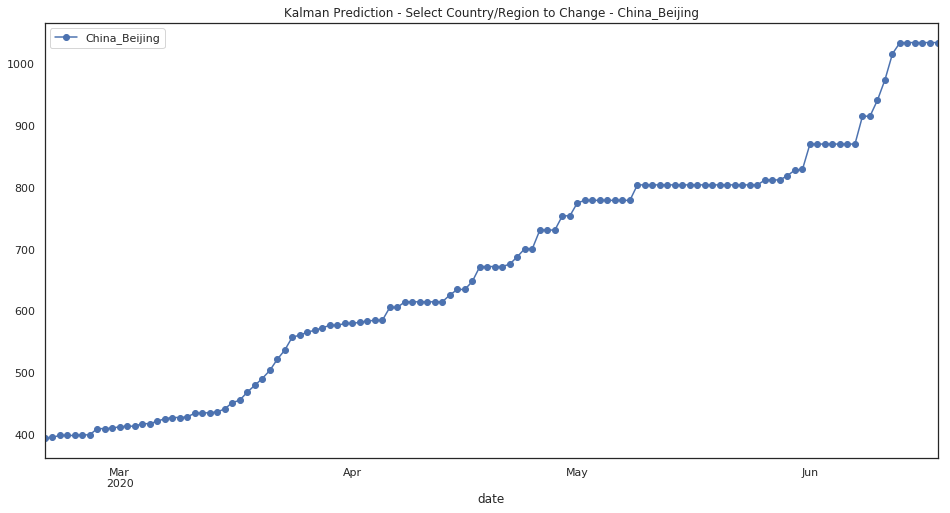

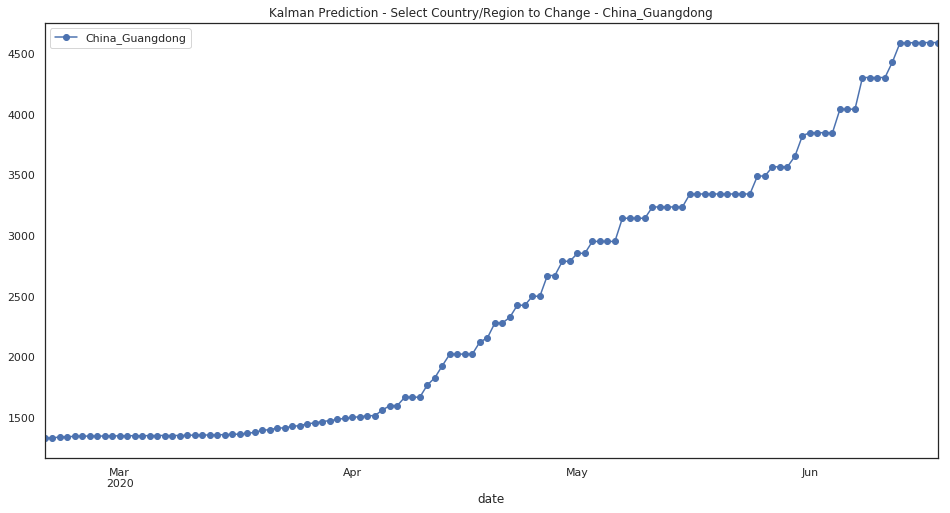

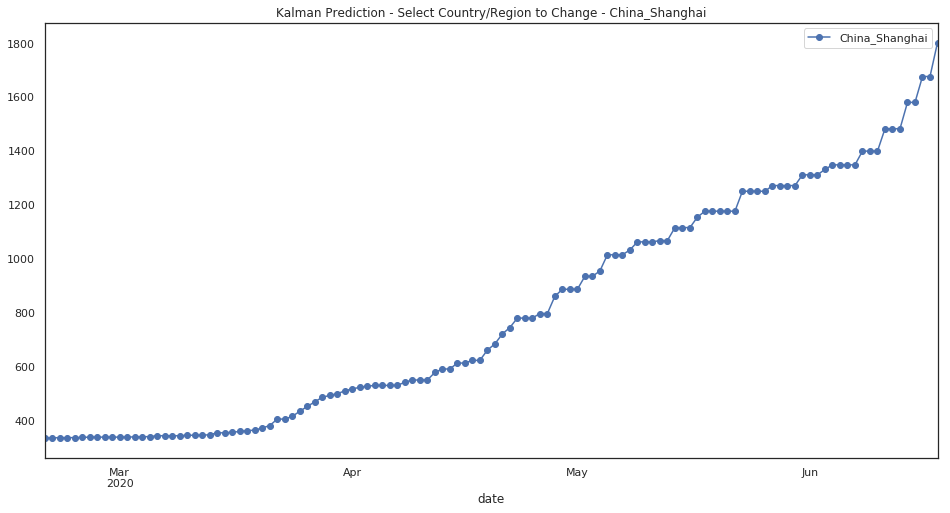

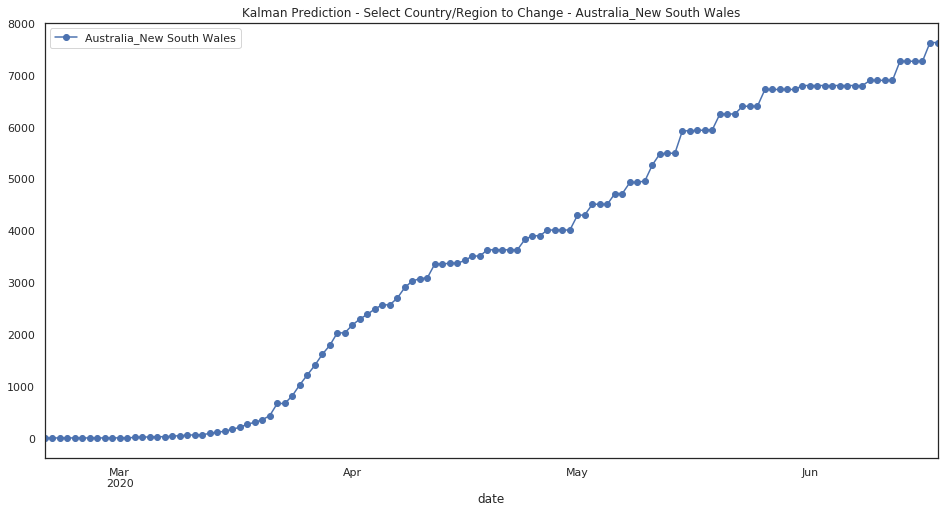

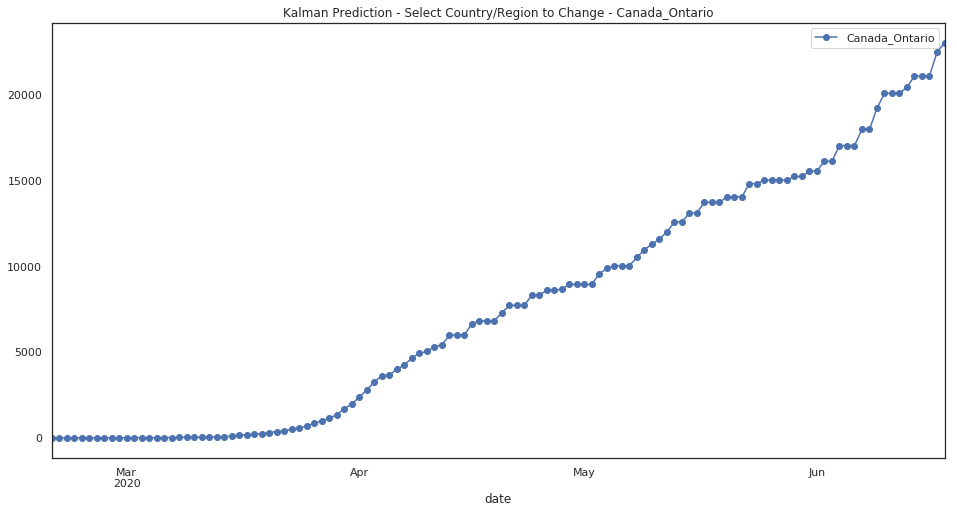

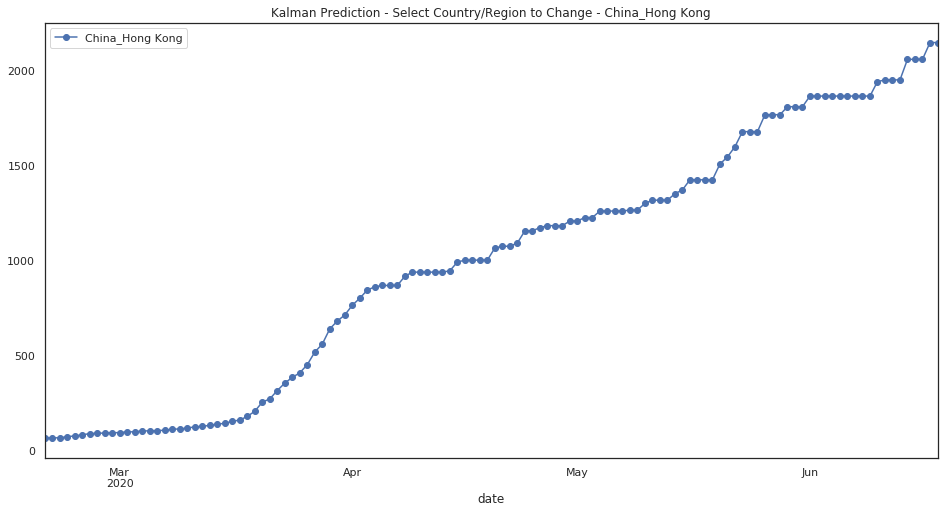

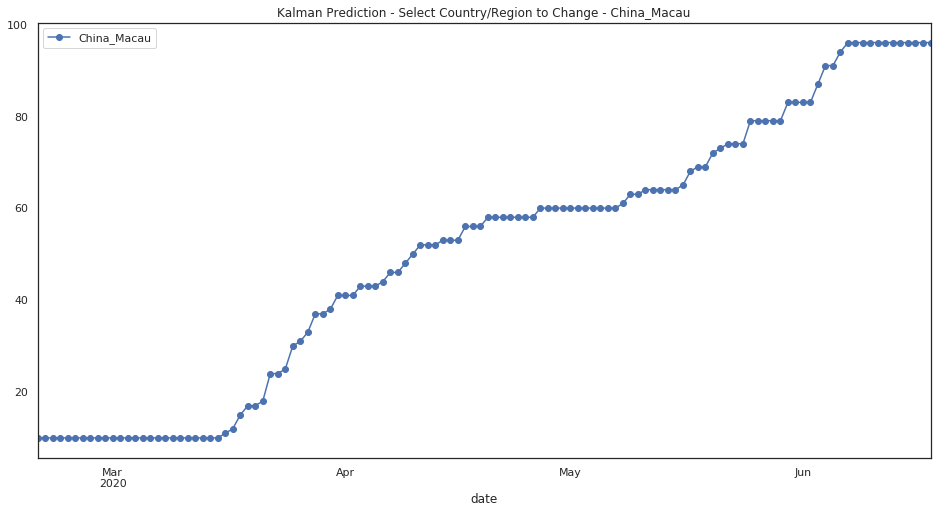

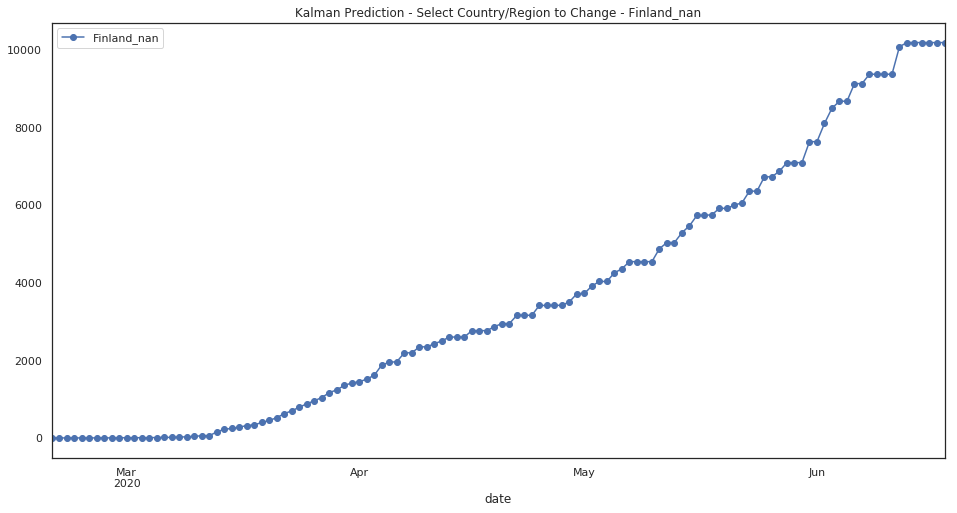

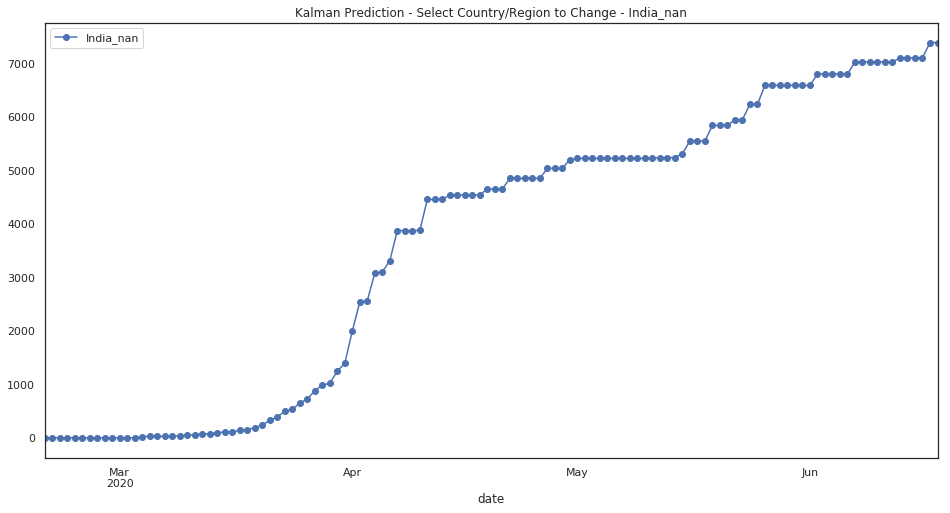

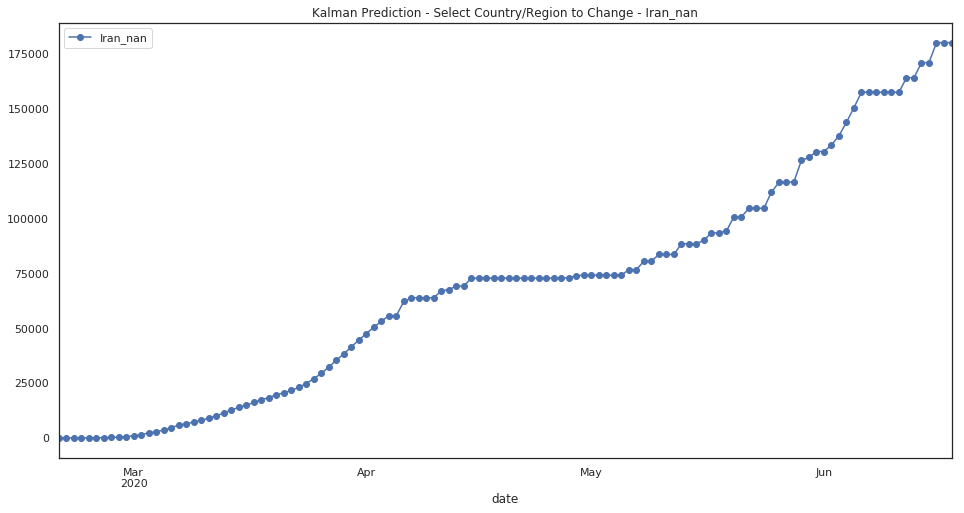

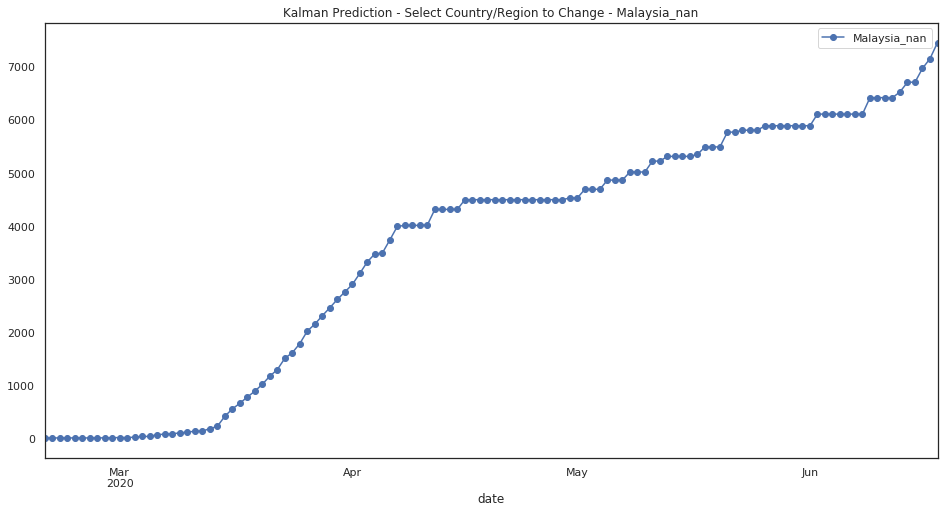

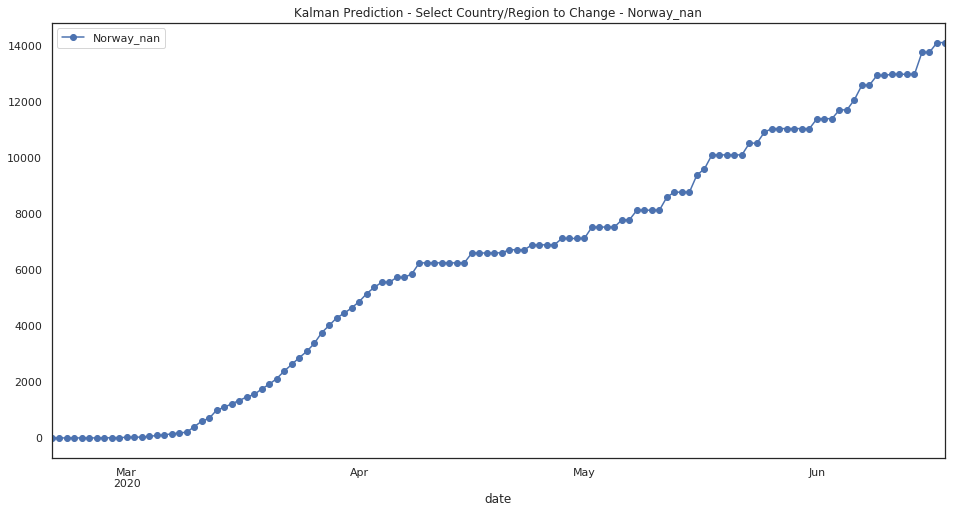

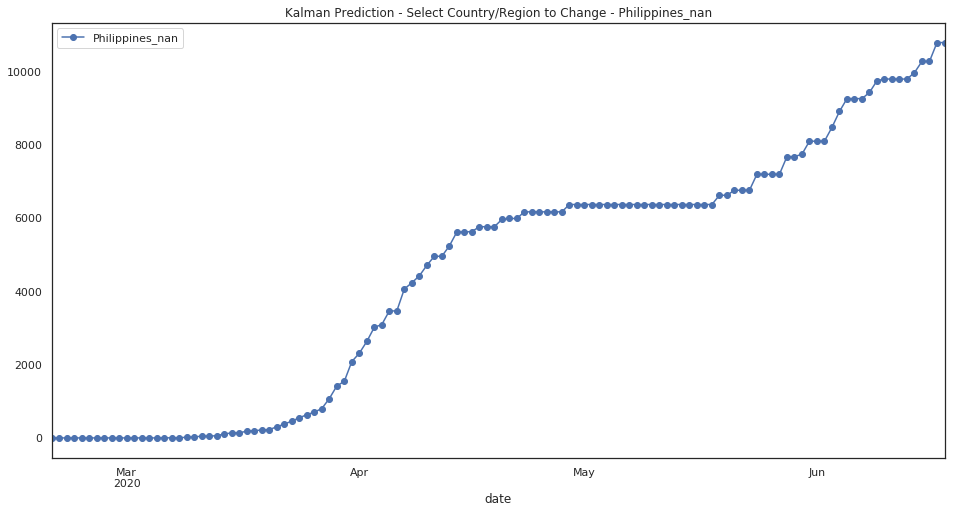

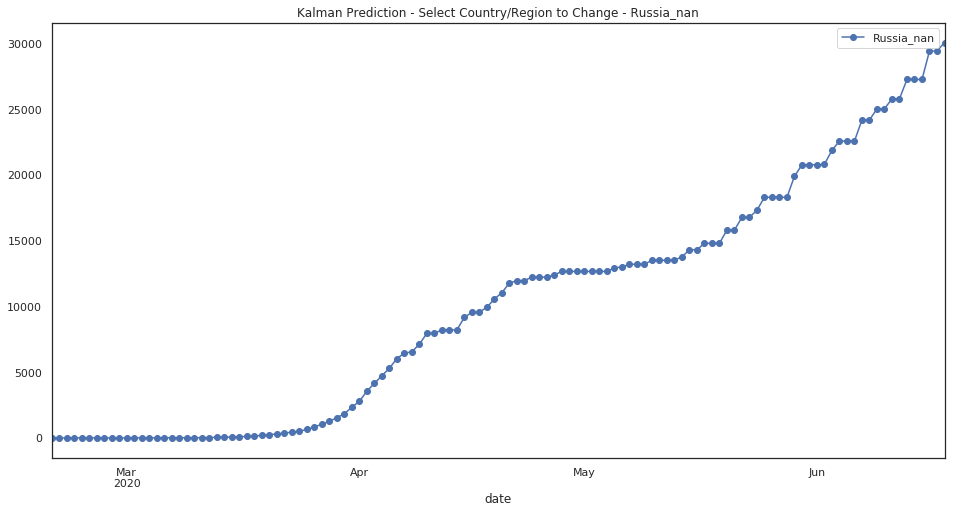

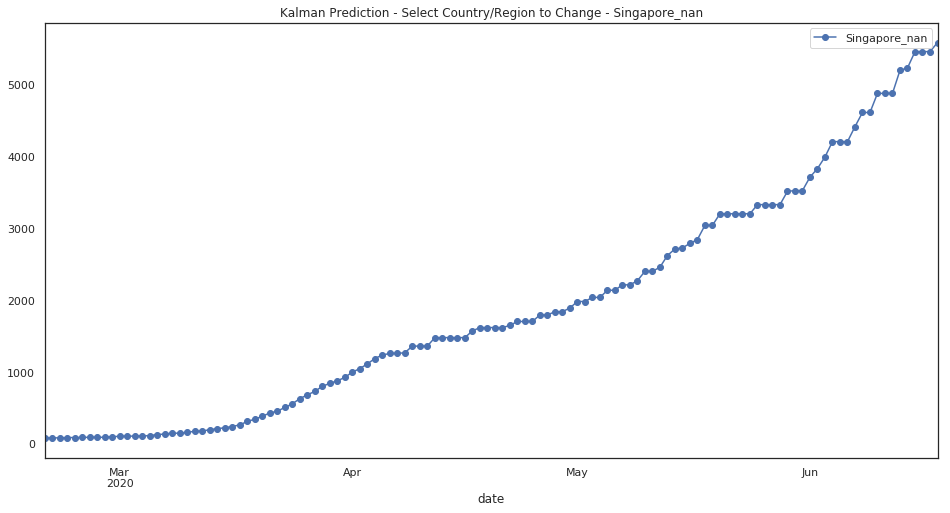

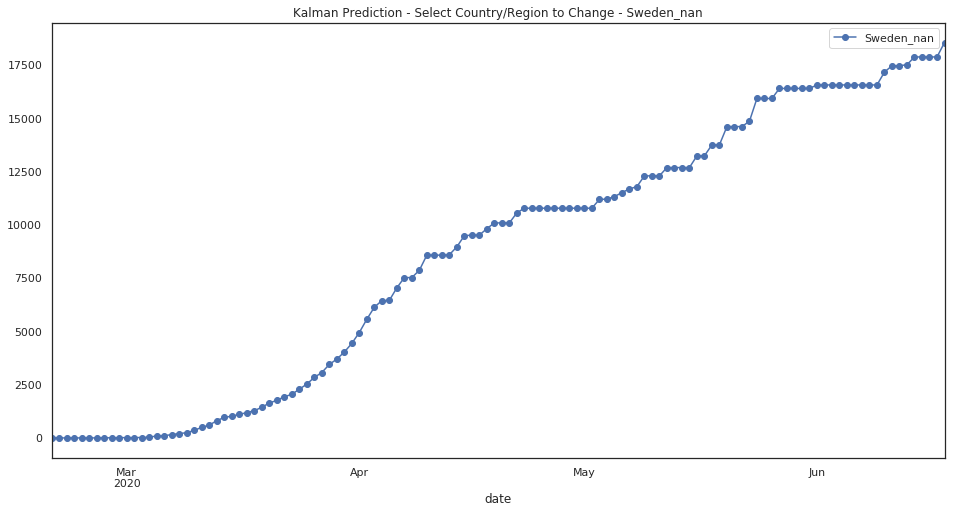

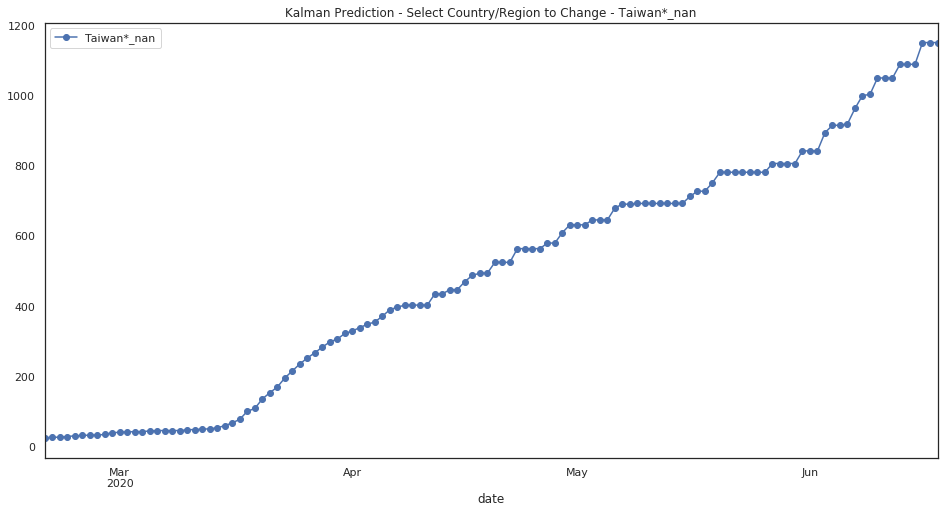

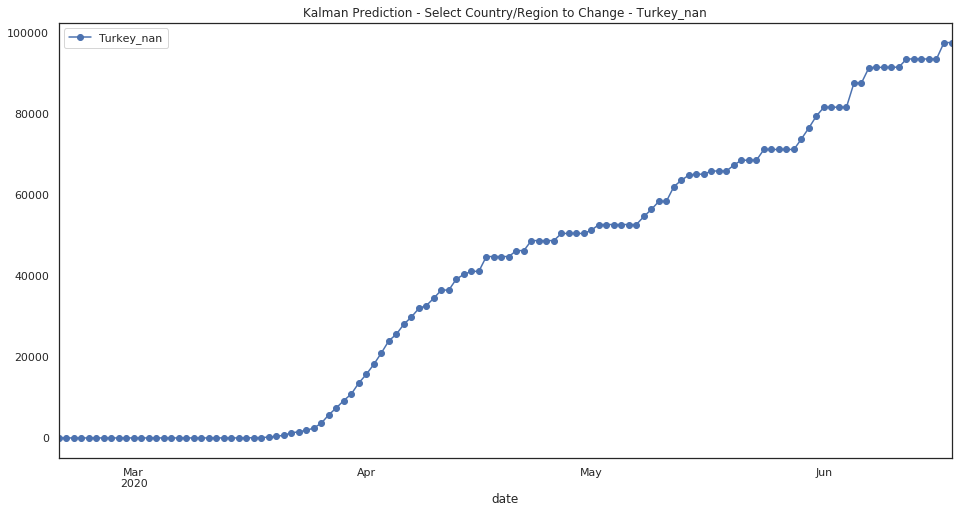

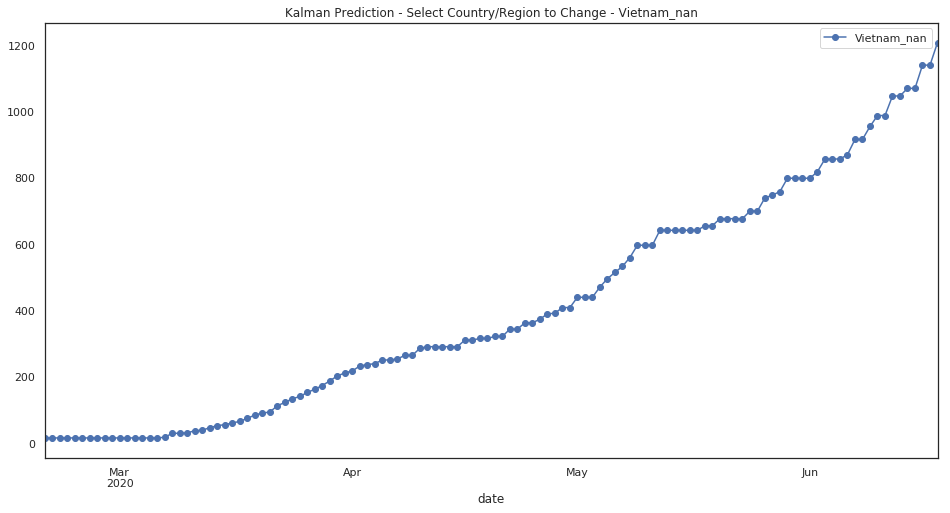

In [69]:
### Joao - Dynamic print
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [70]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [71]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [72]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-2,2]-1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-4,2]-1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-8,2]-1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(1)
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
test_iter['infected_rate'] =(test_iter['last_day']+1)/(test_iter['population']+1)*10000
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [73]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [74]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        

pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [75]:
pred[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-04-05            299.0        333.0       1251.0        466.0   
2020-04-06            320.0        344.0       1251.0        466.0   
2020-04-07            327.0        362.0       1458.0        473.0   
2020-04-08            372.0        362.0       1507.0        503.0   
2020-04-09            372.0        362.0       1637.0        506.0   
2020-04-10            382.0        369.0       1637.0        514.0   
2020-04-11            422.0        403.0       1801.0        540.0   
2020-04-12            422.0        412.0       1936.0        575.0   
2020-04-13            422.0        412.0       1936.0        575.0   
2020-04-14            466.0        429.0       2109.0        598.0   
2020-04-15            486.0        429.0       2109.0        629.0   
2020-04-16            486.0        429.0       2109.0        632.0   
2020-04-17            486.0        429.0       2235.0        671.0   
2020-04-18            496.0        429.0       2295.0        702.0   
2020-04-19            535.0        434.0       2295.0        702.0   
2020-04-20            535.0        438.0       2295.0        745.0   
2020-04-21            555.0        438.0       2297.0        745.0   
2020-04-22            594.0        449.0       2297.0        808.0   
2020-04-23            594.0        470.0       2297.0        808.0   
2020-04-24            594.0        470.0       2297.0        830.0   
2020-04-25            638.0        470.0       2324.0        850.0   
2020-04-26            638.0        470.0       2324.0        858.0   
2020-04-27            638.0        503.0       2324.0        858.0   
2020-04-28            692.0        505.0       2346.0        858.0   
2020-04-29            692.0        505.0       2364.0        858.0   
2020-04-30            692.0        511.0       2364.0        908.0   
2020-05-01            692.0        530.0       2389.0        916.0   
2020-05-02            692.0        530.0       2389.0        916.0   
2020-05-03            696.0        530.0       2479.0        962.0   
2020-05-04            696.0        530.0       2479.0        988.0   
...                     ...          ...          ...          ...   
2020-05-21            921.0        615.0       3064.0       1360.0   
2020-05-22            921.0        626.0       3215.0       1370.0   
2020-05-23            921.0        626.0       3288.0       1418.0   
2020-05-24            921.0        626.0       3417.0       1418.0   
2020-05-25            921.0        626.0       3417.0       1418.0   
2020-05-26            965.0        626.0       3557.0       1454.0   
2020-05-27            965.0        626.0       3599.0       1454.0   
2020-05-28            965.0        630.0       3693.0       1454.0   
2020-05-29            981.0        630.0       3892.0       1454.0   
2020-05-30            981.0        630.0       3982.0       1454.0   
2020-05-31            981.0        630.0       3982.0       1454.0   
2020-06-01            992.0        641.0       4165.0       1454.0   
2020-06-02            992.0        643.0       4165.0       1526.0   
2020-06-03           1000.0        643.0       4371.0       1526.0   
2020-06-04           1001.0        643.0       4371.0       1526.0   
2020-06-05           1023.0        643.0       4371.0       1526.0   
2020-06-06           1040.0        667.0       4377.0       1543.0   
2020-06-07           1040.0        667.0       4641.0       1543.0   
2020-06-08           1059.0        667.0       4641.0       1588.0   
2020-06-09           1083.0        680.0       4884.0       1661.0   
2020-06-10           1083.0        680.0       4884.0       1661.0   
2020-06-11           1093.0        680.0       4884.0       1661.0   
2020-06-12           1093.0        682.0       4919.0       1724.0   
2020-06-13           1131.0        682.0       4919.0       1724.0   
2020-06-14

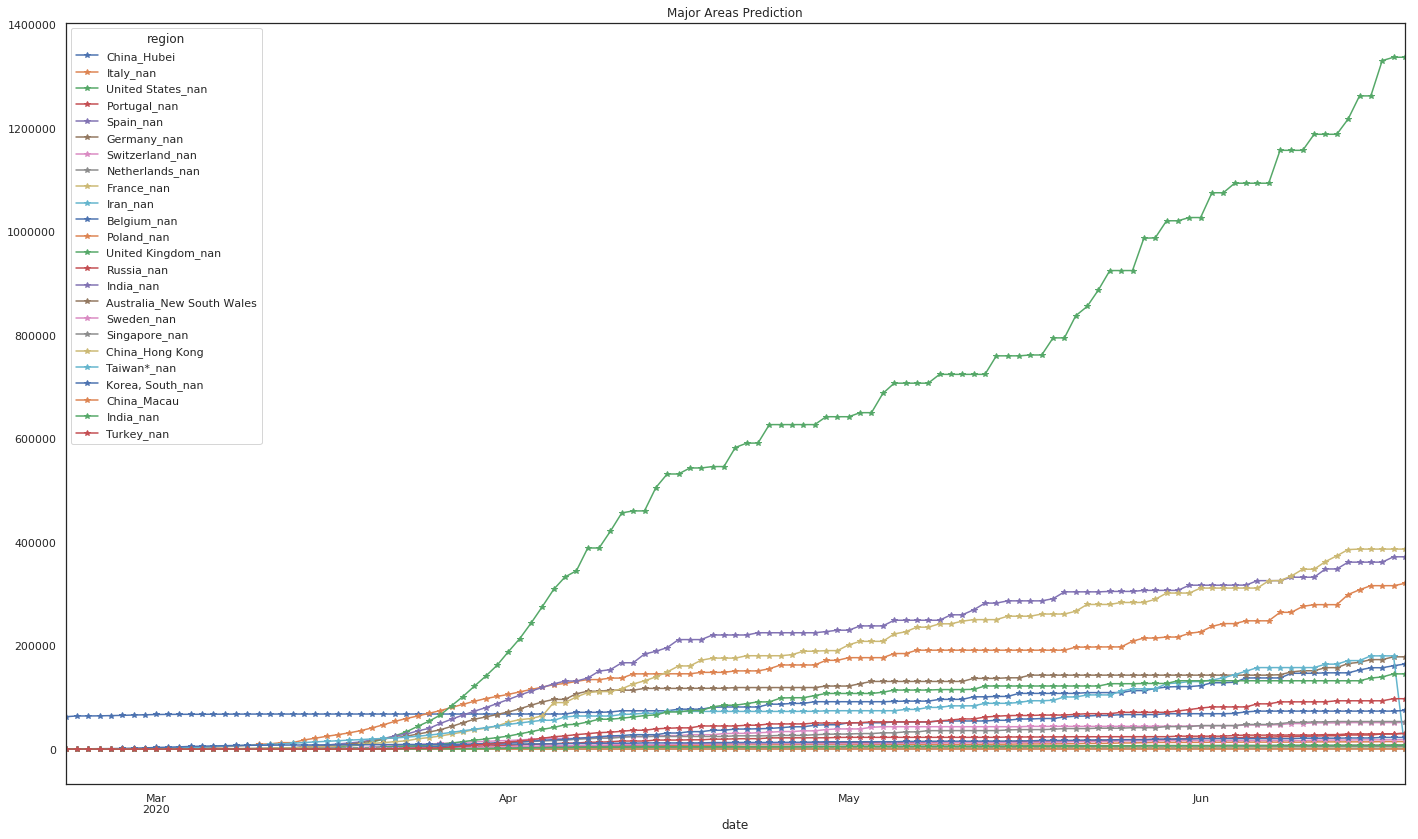

In [76]:
region=[
 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'China_Hubei',
        'Italy_nan',
        'United States_nan',
        'Portugal_nan', 'Spain_nan',
        'Germany_nan', 'Switzerland_nan', 
        'Netherlands_nan',
        'France_nan',
        'Iran_nan',
        'Belgium_nan', 'Poland_nan',
        'United Kingdom_nan', 
        'Russia_nan', 'India_nan',
        'Australia_New South Wales',
        'Sweden_nan',
        'Singapore_nan',
        'China_Hong Kong',
        'Taiwan*_nan',
        'Korea, South_nan',
        'China_Macau',
        'India_nan',
        'Turkey_nan'
  ### JOAO - LIST of Countries - Finish here     
       ]

p=pred[region]
p[2:].plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

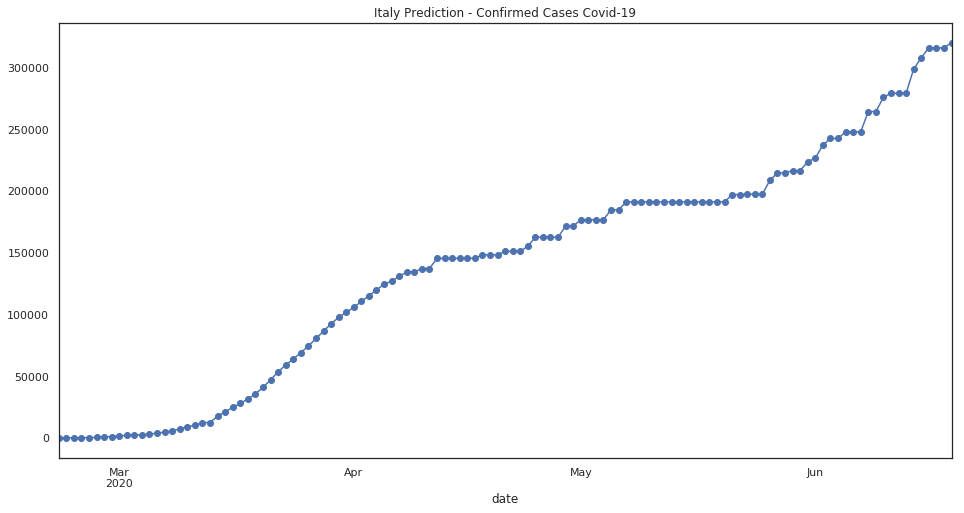

In [77]:
### Joao - Error - KeyError: 'Italy_nan'
p2=pred['Italy_nan']
p2[2:].plot(marker='o',figsize=(16,8),title ='Italy Prediction - Confirmed Cases Covid-19')

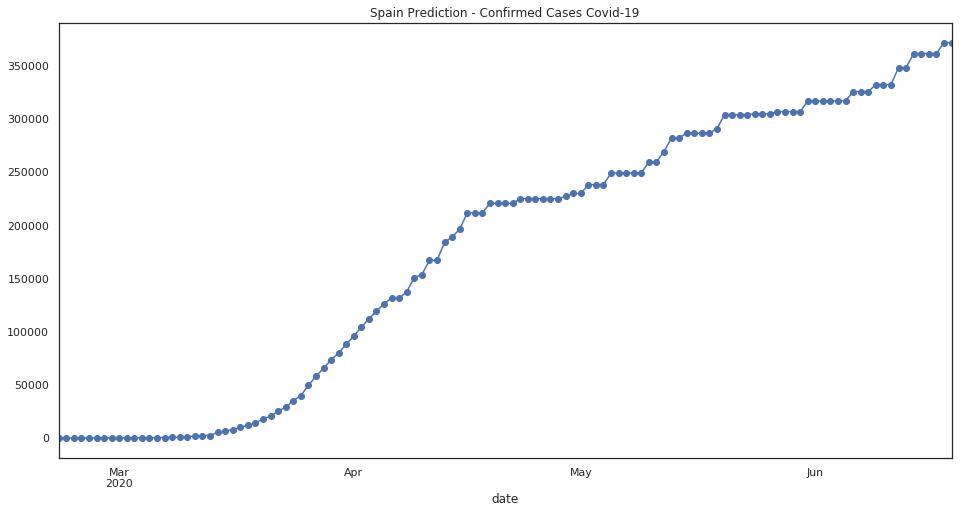

In [78]:
p3=pred['Spain_nan']
p3[2:].plot(marker='o',figsize=(16,8),title ='Spain Prediction - Confirmed Cases Covid-19')

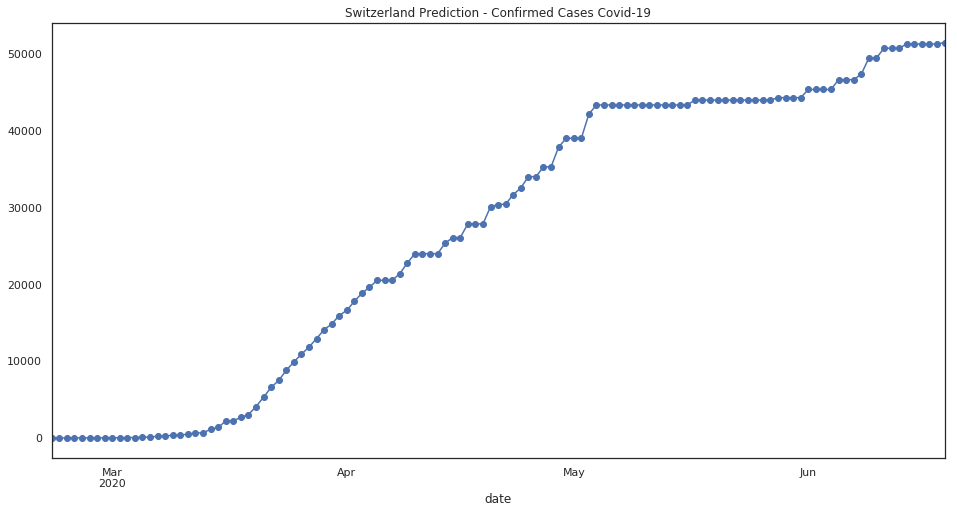

In [79]:
p4=pred['Switzerland_nan']
p4[2:].plot(marker='o',figsize=(16,8),title ='Switzerland Prediction - Confirmed Cases Covid-19')

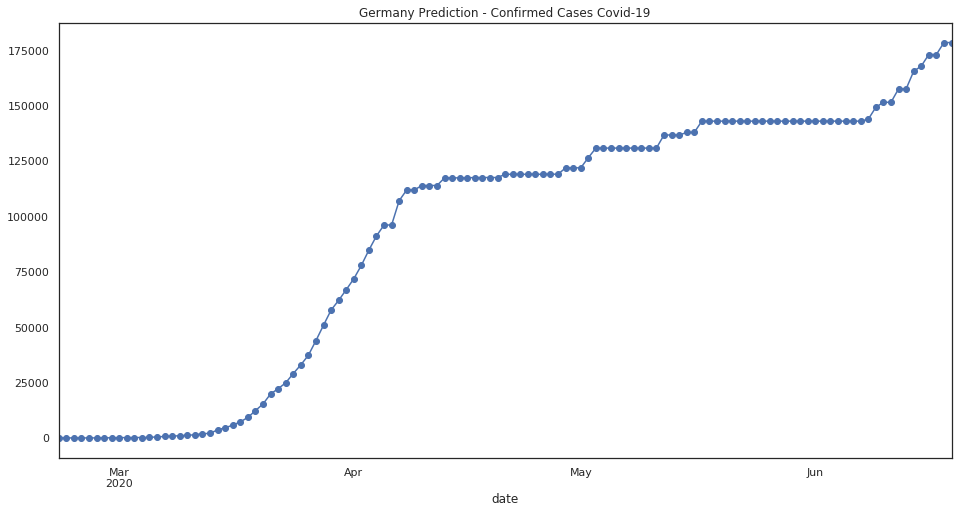

In [80]:
p5=pred['Germany_nan']
p5[2:].plot(marker='o',figsize=(16,8),title ='Germany Prediction - Confirmed Cases Covid-19')

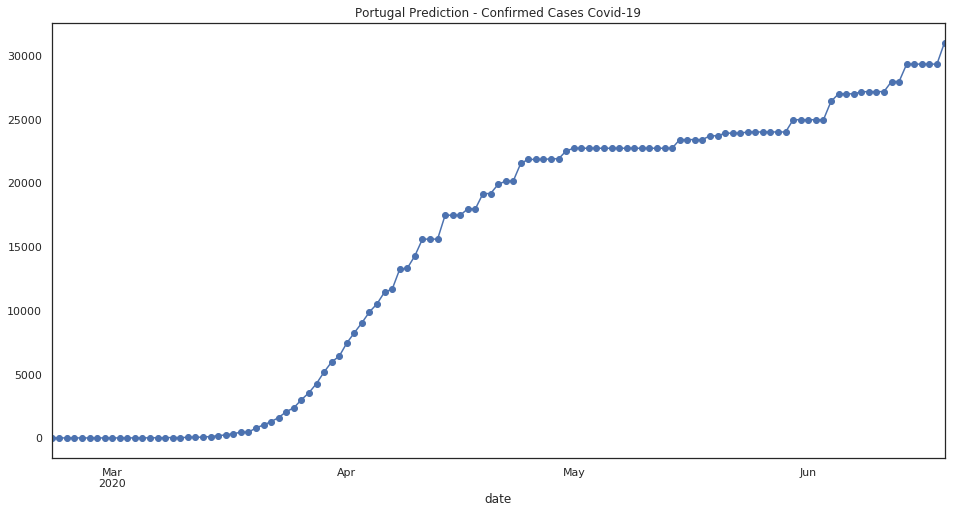

In [81]:
p6=pred['Portugal_nan']
p6[2:].plot(marker='o',figsize=(16,8),title ='Portugal Prediction - Confirmed Cases Covid-19')

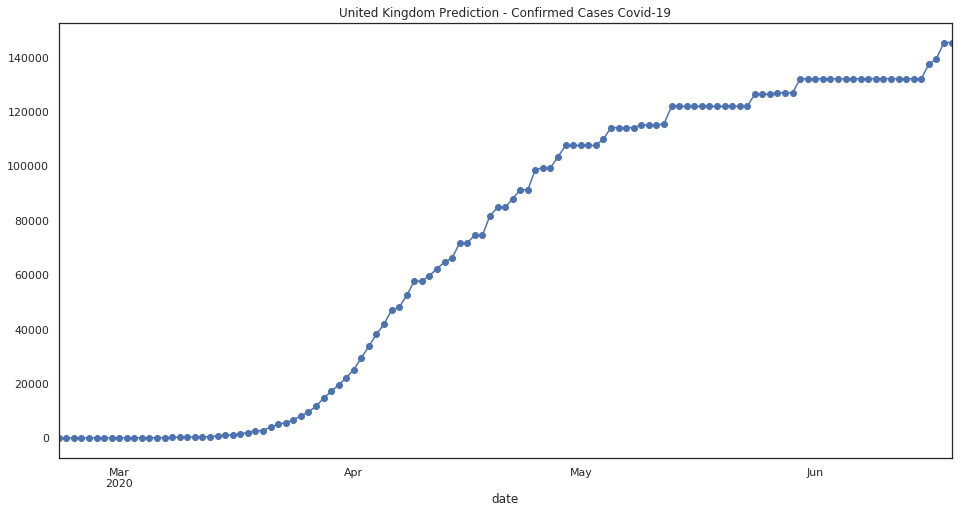

In [82]:
p8=pred['United Kingdom_nan']
p8[2:].plot(marker='o',figsize=(16,8),title ='United Kingdom Prediction - Confirmed Cases Covid-19')

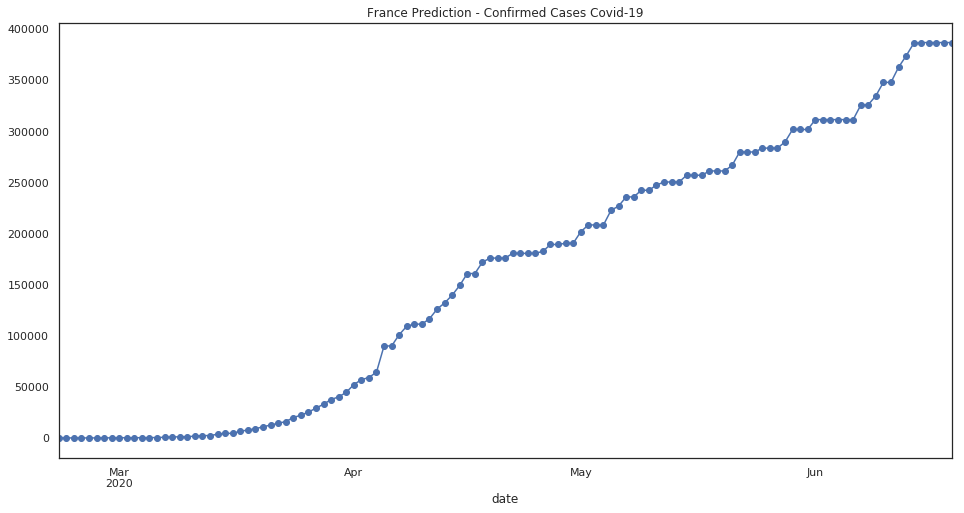

In [83]:
p9=pred['France_nan']
p9[2:].plot(marker='o',figsize=(16,8),title ='France Prediction - Confirmed Cases Covid-19')

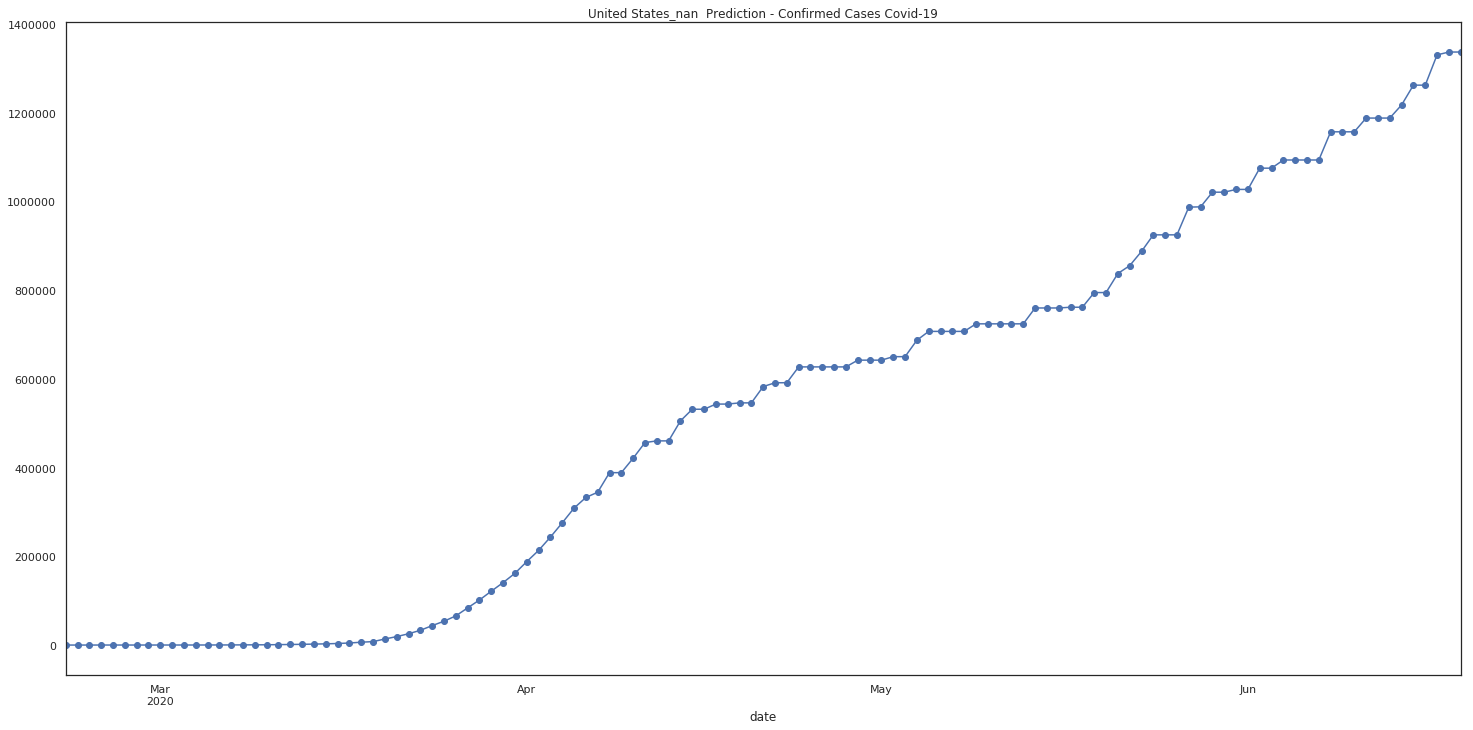

In [84]:
p10=pred['United States_nan']
p10[2:].plot(marker='o',figsize=(25,12),title ='United States_nan  Prediction - Confirmed Cases Covid-19')

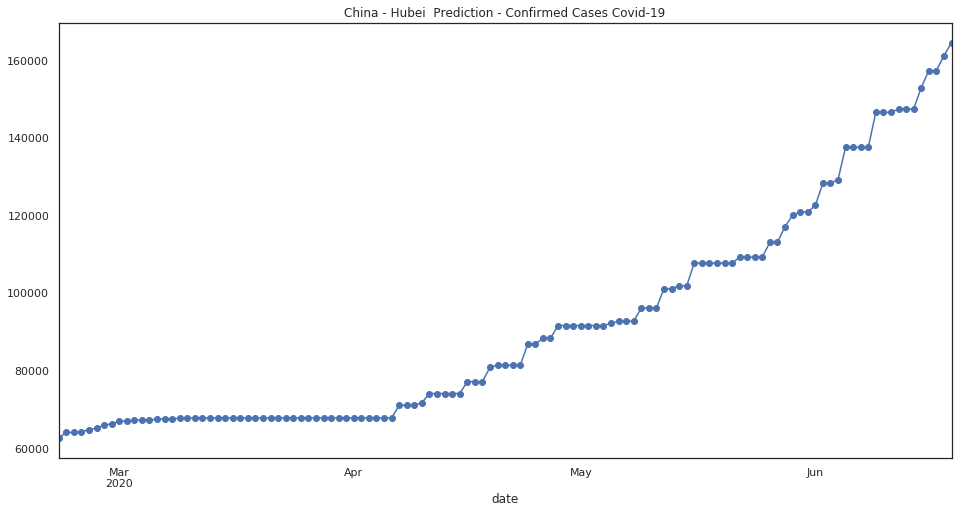

In [85]:
p11=pred['China_Hubei']
p11[2:].plot(marker='o',figsize=(16,8),title ='China - Hubei  Prediction - Confirmed Cases Covid-19')

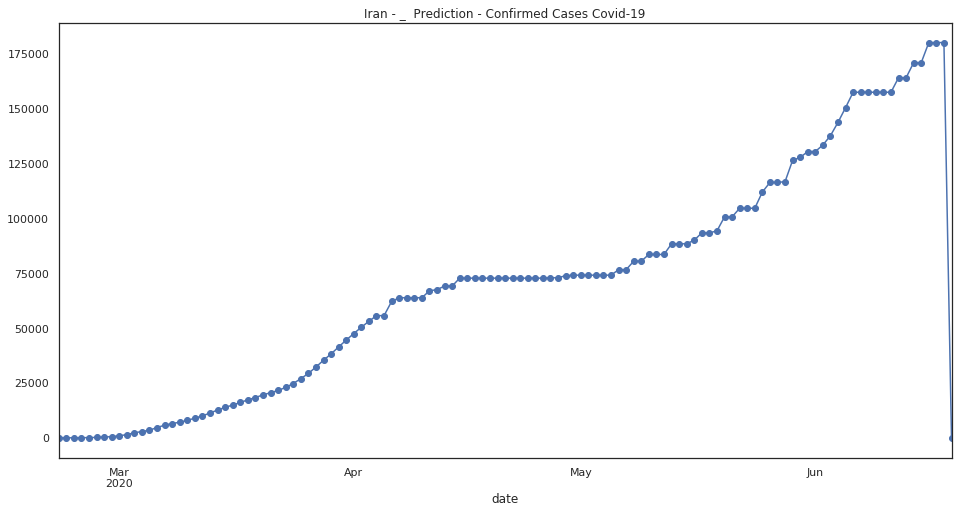

In [86]:
p12=pred['Iran_nan']
p12[2:].plot(marker='o',figsize=(16,8),title ='Iran - _  Prediction - Confirmed Cases Covid-19')

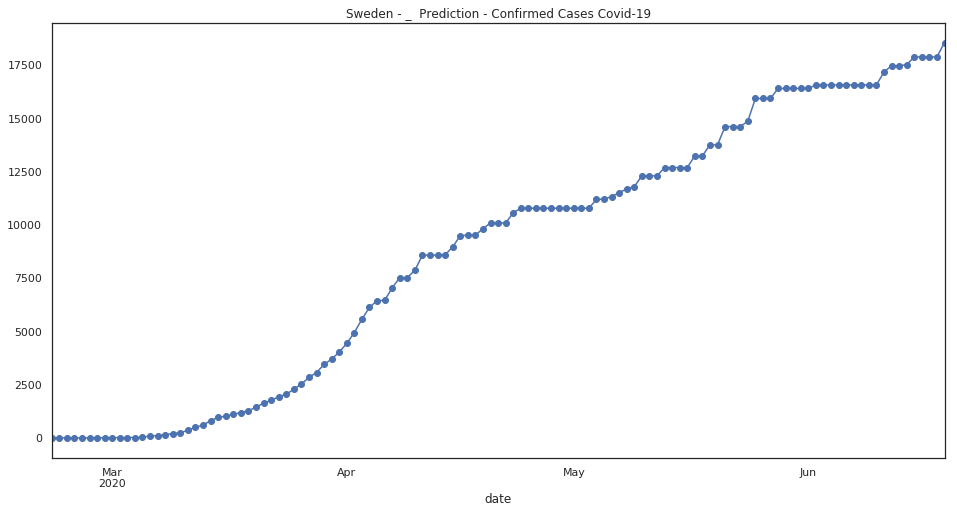

In [87]:
p13=pred['Sweden_nan']
p13[2:].plot(marker='o',figsize=(16,8),title ='Sweden - _  Prediction - Confirmed Cases Covid-19')

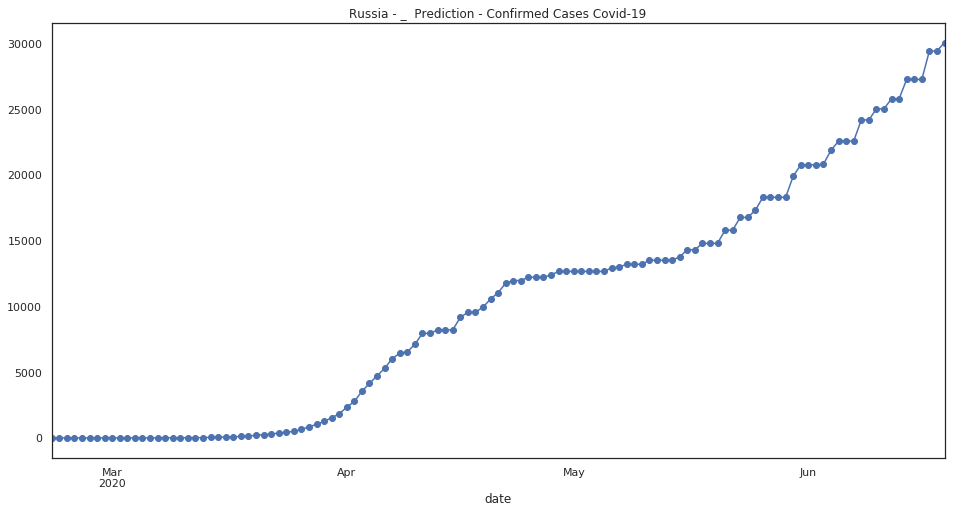

In [88]:
p13=pred['Russia_nan']
p13[2:].plot(marker='o',figsize=(16,8),title ='Russia - _  Prediction - Confirmed Cases Covid-19')

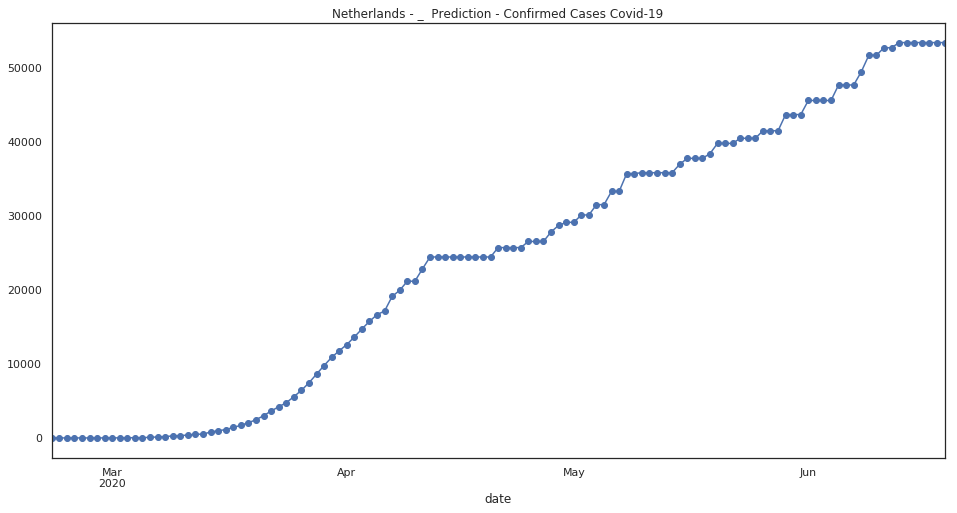

In [89]:
p14=pred['Netherlands_nan']
p14[2:].plot(marker='o',figsize=(16,8),title ='Netherlands - _  Prediction - Confirmed Cases Covid-19')

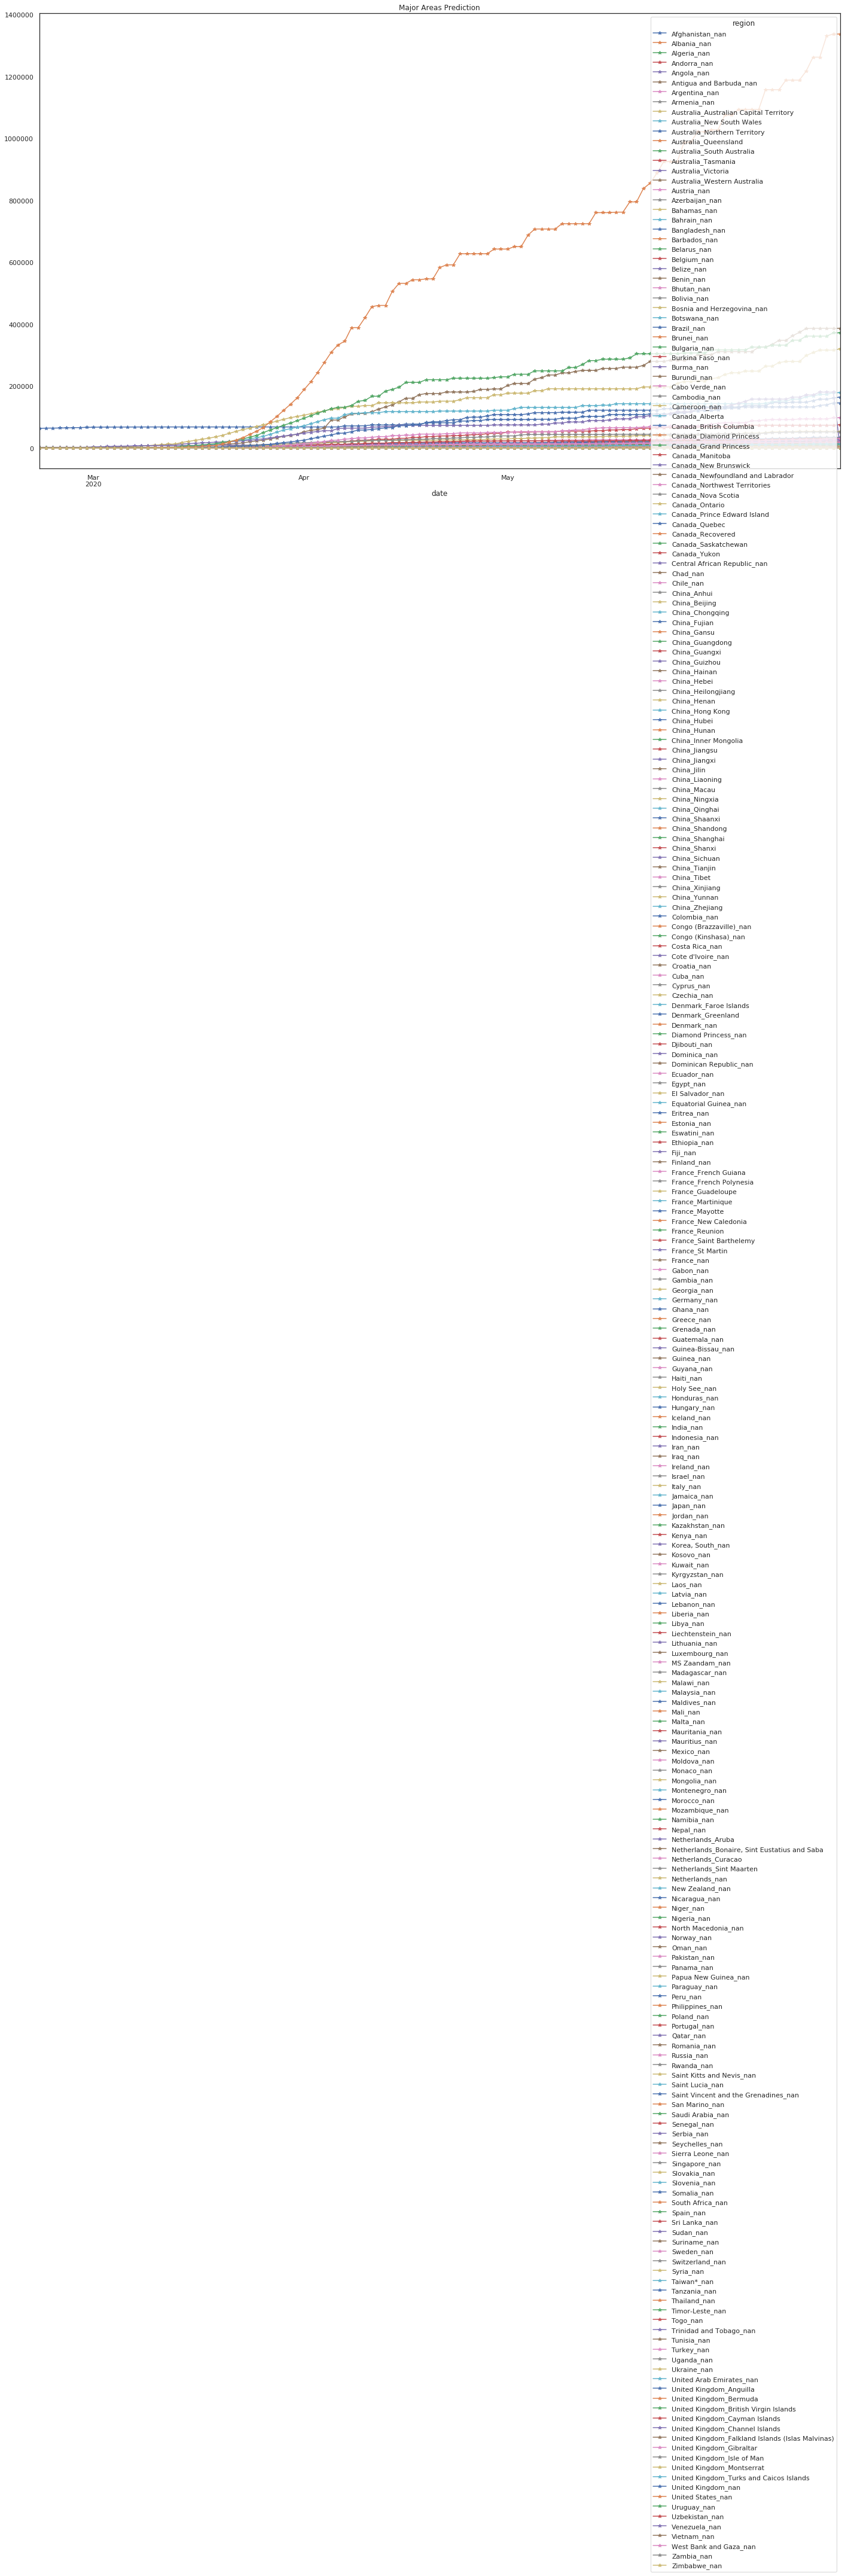

In [90]:
#region=my_train_list
pv2=pred
pv2[2:].plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

In [91]:
pv1=pv2[2:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)


## Prediction Heatmap

In [92]:
p[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-02-22              0.0          0.0          0.0          0.0   
2020-02-23              0.0          0.0          0.0          0.0   
2020-02-24              0.0          0.0          0.0          0.0   
2020-02-25              1.0          0.0          1.0          0.0   
2020-02-26              1.0          0.0          1.0          0.0   
2020-02-27              1.0          0.0          1.0          0.0   
2020-02-28              1.0          0.0          1.0          0.0   
2020-02-29              1.0          0.0          1.0          0.0   
2020-03-01              1.0          0.0          1.0          0.0   
2020-03-02              1.0          0.0          1.0          0.0   
2020-03-03              1.0          0.0          3.0          1.0   
2020-03-04              1.0          0.0          5.0          1.0   
2020-03-05              1.0          0.0         12.0          1.0   
2020-03-06              1.0          0.0         12.0          1.0   
2020-03-07              1.0          0.0         17.0          1.0   
2020-03-08              1.0          0.0         17.0          1.0   
2020-03-09              4.0          0.0         19.0          1.0   
2020-03-10              4.0          2.0         20.0          1.0   
2020-03-11              5.0         10.0         20.0          1.0   
2020-03-12              7.0         12.0         20.0          1.0   
2020-03-13              7.0         23.0         24.0          1.0   
2020-03-14              7.0         33.0         26.0          1.0   
2020-03-15             11.0         38.0         37.0          1.0   
2020-03-16             16.0         42.0         48.0          1.0   
2020-03-17             21.0         51.0         54.0          2.0   
2020-03-18             22.0         55.0         60.0         39.0   
2020-03-19             22.0         59.0         74.0         39.0   
2020-03-20             22.0         64.0         87.0         53.0   
2020-03-21             24.0         70.0         90.0         75.0   
2020-03-22             24.0         76.0        139.0         88.0   
...                     ...          ...          ...          ...   
2020-05-21            921.0        615.0       3064.0       1360.0   
2020-05-22            921.0        626.0       3215.0       1370.0   
2020-05-23            921.0        626.0       3288.0       1418.0   
2020-05-24            921.0        626.0       3417.0       1418.0   
2020-05-25            921.0        626.0       3417.0       1418.0   
2020-05-26            965.0        626.0       3557.0       1454.0   
2020-05-27            965.0        626.0       3599.0       1454.0   
2020-05-28            965.0        630.0       3693.0       1454.0   
2020-05-29            981.0        630.0       3892.0       1454.0   
2020-05-30            981.0        630.0       3982.0       1454.0   
2020-05-31            981.0        630.0       3982.0       1454.0   
2020-06-01            992.0        641.0       4165.0       1454.0   
2020-06-02            992.0        643.0       4165.0       1526.0   
2020-06-03           1000.0        643.0       4371.0       1526.0   
2020-06-04           1001.0        643.0       4371.0       1526.0   
2020-06-05           1023.0        643.0       4371.0       1526.0   
2020-06-06           1040.0        667.0       4377.0       1543.0   
2020-06-07           1040.0        667.0       4641.0       1543.0   
2020-06-08           1059.0        667.0       4641.0       1588.0   
2020-06-09           1083.0        680.0       4884.0       1661.0   
2020-06-10           1083.0        680.0       4884.0       1661.0   
2020-06-11           1093.0        680.0       4884.0       1661.0   
2020-06-12           1093.0        682.0       4919.0       1724.0   
2020-06-13           1131.0        682.0       4919.0       1724.0   
2020-06-14

In [93]:

#pip install gmplot

In [94]:
p.to_csv('/home/notebookuser/notebooks/covid19/data/p_confirmed_daily.csv', index = False, header=True)

In [95]:
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [96]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
heatmap=heatmap[heatmap['region'].isin(region)]
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')

In [97]:
heatmap_m[:]

region      Lat      Long  2020-02-22 00:00:00  \
0   Australia_New South Wales -33.8688  151.2093                  4.0   
1                 Belgium_nan  50.8333    4.0000                  1.0   
2             China_Hong Kong  22.3000  114.2000                 68.0   
3                 China_Hubei  30.9756  112.2707              62662.0   
4                 China_Macau  22.1667  113.5500                 10.0   
5                  France_nan  46.2276    2.2137                 12.0   
6                 Germany_nan  51.0000    9.0000                 16.0   
7                   India_nan  21.0000   78.0000                  3.0   
8                    Iran_nan  32.0000   53.0000                 28.0   
9                    Iran_nan  32.0000   53.0000                 28.0   
10                  Italy_nan  43.0000   12.0000                 20.0   
11           Korea, South_nan  36.0000  128.0000                204.0   
12            Netherlands_nan  52.1326    5.2913                  0.0   
13                 Poland_nan  51.9194   19.1451                  0.0   
14               Portugal_nan  39.3999   -8.2245                  0.0   
15                 Russia_nan  60.0000   90.0000                  2.0   
16              Singapore_nan   1.2833  103.8333                 85.0   
17                  Spain_nan  40.0000   -4.0000                  2.0   
18                 Sweden_nan  63.0000   16.0000                  1.0   
19            Switzerland_nan  46.8182    8.2275                  0.0   
20                Taiwan*_nan  23.7000  121.0000                 26.0   
21                 Turkey_nan  38.9637   35.2433                  0.0   
22         United Kingdom_nan  55.3781   -3.4360                  9.0   
23          United States_nan  37.0902  -95.7129                 15.0   

    2020-02-23 00:00:00  2020-02-24 00:00:00  2020-02-25 00:00:00  \
0                   4.0                  4.0                  4.0   
1                   1.0                  1.0                  1.0   
2                  69.0                 74.0                 84.0   
3               64084.0              64084.0              64287.0   
4                  10.0                 10.0                 10.0   
5                  12.0                 12.0                 12.0   
6                  16.0                 16.0                 17.0   
7                   3.0                  3.0                  3.0   
8                  43.0                 61.0                 95.0   
9                  43.0                 61.0                 95.0   
10                 62.0                155.0                229.0   
11                433.0                602.0                833.0   
12                  0.0                  0.0                  0.0   
13                  0.0                  0.0                  0.0   
14                  0.0                  0.0                  0.0   
15                  2.0                  2.0                  2.0   
16                 85.0                 89.0                 89.0   
17                  2.0                  2.0                  6.0   
18                  1.0                  1.0                  1.0   
19                  0.0                  0.0                  1.0   
20                 26.0                 28.0                 30.0   
21                  0.0                  0.0                  0.0   
22                  9.0                  9.0                 13.0   
23                 15.0                 15.0                 51.0   

    2020-02-26 00:00:00  2020-02-27 00:00:00  2020-02-28 00:00:00  ...  \
0                   4.0                  4.0                  4.0  ...   
1                   1.0                  1.0                  1.0  ...   
2                  84.0                 91.0                 92.0  ...   
3               64786.0              65187.0              65914.0  ...   
4                  10.0                 10.0                 10.0  ...   
5                  14.0    

In [98]:
heatmap=pd.DataFrame()
vmaxni=len(heatmap_m)
vmaxnii=(vmaxni)-1
for i in range(0,len(heatmap)):
    if heatmap_m.iloc[i,vmaxni].astype(int)==0:     #### heatmap_m.iloc[i,61] # heatmap_m.iloc[i,9] columns is the date we want to check
        continue
    #heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),1:3]]*abs(heatmap_m.iloc[i,(i+1)].astype(int)), ignore_index=True,sort=False)) 
    heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),1:vmaxnii]]*abs(heatmap_m.iloc[i:(i+1),1:vmaxnii].astype(int)), ignore_index=True,sort=False)) 


In [99]:
### Joao - Print in datetime
from datetime import datetime
#
latitudes = heatmap_m['Lat']
longitudes = heatmap_m['Long']
# Creating the location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
heatmap=heatmap_m
gmap = gmplot.GoogleMapPlotter(46.99474,6.87237, 4)
gmap.heatmap(latitudes, longitudes)
datemap=datetime.today().strftime('%Y-%m-%d')
# Generate the heatmap into an HTML file
gmap.draw("heatmaps/Heatmap-"+datemap+".html")

In [100]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March and now April!")
print(" April-May-June are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March and now April!
 April-May-June are going to be hard with this Global Lock-Down!


In [101]:
exit()

H2O session _sid_9f43 closed.


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
